Clean initial MH + CSSRS data

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# --- 1. Read Excel ---
file_path = "~/Sue Goldie Dropbox/Jacob Jameson/DBH data/MH SA.xlsx"
mh_sa = pd.read_excel(file_path)

# --- 2. Clean column names ---
mh_sa.columns = (
    mh_sa.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[^\w]+", "_", regex=True)  # replace spaces/punctuation with _
)

In [3]:
rename_map = {
    # Identifiers
    "evaluation_date": "eval_date",
    "master_id": "masterid",
    "admission_date": "admit_date",
    "discharge_date": "discharge_date",
    "date_": "record_date",

    # Core C-SSRS questions
    "1_wish_to_be_dead_have_you_wished_you_were_dead_or_wished_you_could_go_to_sleep_and_not_wake_up_": "q1_wish_dead",
    "2_current_suicidal_thoughts_have_you_actually_had_any_thoughts_of_killing_yourself_": "q2_suicidal_thoughts",
    "3_suicidal_thoughts_with_method_with_no_specific_plan_or_intent_or_act_have_you_been_thinking_about_how_you_might_do_this_": "q3_method_no_plan",
    "4_suicidal_intent_without_specific_plan_have_you_had_these_thoughts_and_had_some_intention_of_acting_on_them_": "q4_intent_no_plan",
    "5_intent_with_plan_have_you_started_to_work_out_or_worked_out_the_details_of_how_to_kill_yourself_do_you_intend_to_carry_out_this_plan_": "q5_intent_with_plan",
    "6a_c_ssrs_suicidal_behavior_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_br_br_i_examples_collected_pills_obtained_a_gun_gave_away_valuables_wrote_a_will_or_suicide_note_took_out_pills_but_didn_t_swallow_any_held_a_gun_but_changed_your_mind_or_it_was_grabbed_from_your_hand_went_to_the_roof_but_didn_t_jump_or_actually_took_pills_tried_to_shoot_yourself_cut_yourself_tried_to_hang_yourself_etc_i_": "q6a_behavior",
    "6b_if_yes_was_it_within_the_past_3_months_": "q6b_within_3mo",

    # Variants of C-SSRS denials/NA
    "have_you_wished_you_were_dead_or_wished_you_could_go_to_sleep_and_not_wake_up_no_past_month_": "q1_no_past_month",
    "have_you_been_thinking_about_how_you_might_do_this_no_past_month_": "q3_no_past_month",
    "have_you_had_these_thoughts_and_had_some_intention_of_acting_on_them_no_past_month_": "q4_no_past_month",
    "have_you_started_to_work_out_or_worked_out_the_details_of_how_to_kill_yourself_no_past_month_": "q5_no_past_month",
    "do_you_intend_to_carry_out_this_plan_no": "q5_no_intent",
    "6a_c_ssrs_suicidal_behavior_strong_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_denies": "q6a_behavior_denies",
    "6_c_ssrs_suicidal_behavior_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_no_lifetime_": "q6_behavior_no_lifetime1",
    "c_ssrs_suicidal_behavior_have_you_ever_done_anything_started_to_do_anything_or_prepared_to_do_anything_to_end_your_life_no_lifetime_": "q6_behavior_no_lifetime2",
    "6b_if_yes_was_it_within_the_past_3_months_denies": "q6b_denies",
    "_if_yes_was_it_within_the_past_3_months_n_a": "q6b_na",

    # Diagnoses
    "current_and_past_psychiatric_diagnoses_mood_disorder": "dx_mood",
    "current_and_past_psychiatric_diagnoses_psychotic_disorder": "dx_psychotic",
    "current_and_past_psychiatric_diagnoses_alcohol_substance_use_disorders": "dx_substance",
    "current_and_past_psychiatric_diagnoses_post_traumatic_stress_disorder_ptsd_": "dx_ptsd",
    "current_and_past_psychiatric_diagnoses_attention_deficit_hyperactivity_disorder_adhd_": "dx_adhd",
    "current_and_past_psychiatric_diagnoses_traumatic_brain_injury_tbi_": "dx_tbi",
    "current_and_past_psychiatric_diagnoses_cluster_b_personality_disorders_or_traits_e_g_borderline_antisocial_histrionic_narcissistic_": "dx_clusterb",
    "current_and_past_psychiatric_diagnoses_conduct_problems_e_g_antisocial_behavior_aggression_impulsivity_": "dx_conduct",
    "current_and_past_psychiatric_diagnoses_recent_onset_of_diagnosis": "dx_recent",
    "current_and_past_psychiatric_diagnoses_none": "dx_none",

    # Presenting symptoms
    "presenting_symptoms_anhedonia_lack_of_pleasure_": "symp_anhedonia",
    "presenting_symptoms_impulsivity": "symp_impulsivity",
    "presenting_symptoms_hopelessness_or_despair": "symp_hopeless",
    "presenting_symptoms_anxiety_and_or_panic": "symp_anxiety",
    "presenting_symptoms_insomnia": "symp_insomnia",
    "presenting_symptoms_command_hallucinations": "symp_cmd_halluc",
    "presenting_symptoms_psychosis": "symp_psychosis",
    "presenting_symptoms_none": "symp_none",

    # Family history
    "family_history_suicide": "fam_suicide",
    "family_history_suicidal_behavior": "fam_suicidal_behavior",
    "family_history_psychiatric_diagnoses_requiring_hospitalization": "fam_psych_hosp",
    "family_history_none": "fam_none",

    # Stressors
    "precipitants_stressors_triggering_events_leading_to_humiliation_shame_and_or_despair_e_g_loss_of_relationship_financial_or_health_status_": "precip_triggering",
    "precipitants_stressors_chronic_physical_pain_or_other_acute_medical_problem_e_g_cns_disorders_": "precip_pain_medical",
    "precipitants_stressors_sexual_physical_abuse": "precip_abuse",
    "precipitants_stressors_substance_intoxication_or_withdrawal": "precip_substance",
    "precipitants_stressors_pending_incarceration_or_homelessness": "precip_incarc_homeless",
    "precipitants_stressors_legal_problems": "precip_legal",
    "precipitants_stressors_inadequate_social_supports": "precip_low_support",
    "precipitants_stressors_social_isolation": "precip_isolation",
    "precipitants_stressors_perceived_burden_on_others": "precip_burden",
    "precipitants_stressors_none": "precip_none",

    # Change in treatment
    "change_in_treatment_recent_inpatient_discharge": "treat_recent_discharge",
    "change_in_treatment_change_in_provider_or_treatment_e_g_medications_psychotherapy_milieu_": "treat_change_provider",
    "change_in_treatment_hopeless_or_dissatisfied_with_provider_or_treatment": "treat_dissatisfied",
    "change_in_treatment_non_compliant_or_not_receiving_treatment": "treat_noncompliant",
    "change_in_treatment_none": "treat_none",

    # Lethal means
    "access_to_lethal_methods_does_patient_have_access_to_means_including_firearms_in_the_home_": "access_lethal_means",

    # Protective factors
    "internal_protective_factors_ability_to_cope_with_stress": "prot_int_cope",
    "internal_protective_factors_frustration_tolerance": "prot_int_frustration",
    "internal_protective_factors_religious_beliefs": "prot_int_religion",
    "internal_protective_factors_fear_of_death_or_the_actual_act_of_killing_self": "prot_int_fear_death",
    "internal_protective_factors_identifies_reasons_for_living": "prot_int_reasons",
    "internal_protective_factors_problem_solving_skills": "prot_int_problem_solving",
    "internal_protective_factors_able_to_access_care_willing_to_reach_out": "prot_int_access_care",

    "external_protective_factors_cultural_spiritual_and_or_moral_attitudes_against_suicide": "prot_ext_cultural",
    "external_protective_factors_responsibility_to_children": "prot_ext_children",
    "external_protective_factors_beloved_pets": "prot_ext_pets",
    "external_protective_factors_supportive_social_network_of_family_or_friends": "prot_ext_network",
    "external_protective_factors_positive_therapeutic_relationships": "prot_ext_therapeutic",
    "external_protective_factors_engaged_in_work_school_or_sports": "prot_ext_engaged",
    "external_protective_factors_high_academic_achievement": "prot_ext_academic",

    # Score
    "total_score": "score",

    # Risk/judgment fields
    "based_on_patient_s_responses_in_step_1_and_the_risk_level_guideline_provided_select_the_determined_b_risk_level_b_for_the_patient_": "risk_guideline",
    "does_your_clinical_judgment_change_patient_s_level_of_risk_that_was_determined_by_the_risk_level_guideline_": "risk_judgment_change1",
    "does_your_clinical_judgment_change_patient_s_level_of_risk_that_was_determined_by_the_risk_level_guideline_1": "risk_judgment_change2",
    "final_b_risk_level_b_including_any_change_based_on_clinical_judgment_if_applicable_u_": "risk_final",
    "risk_level_": "risk_level",
    "please_click_here_for_high_risk_level_if_applicable_": "risk_high_click",
    "please_click_here_for_moderate_risk_level_if_applicable_": "risk_mod_click",
    "please_click_here_for_low_risk_level_if_applicable_": "risk_low_click",

    # Staff/review
    "staff_signature_1": "staff_sig1",
    "staff_signature_2": "staff_sig2",
    "staff_signature_3": "staff_sig3",
    "staff_signature_4": "staff_sig4",
    "review_signature_1": "review_sig1",
    "review_signature_2": "review_sig2",
    "review_signature_3": "review_sig3",
    "review_signature_4": "review_sig4",
}

# --- Apply renaming ---
mh_sa = mh_sa.rename(columns=rename_map)

In [4]:
# --- Helper to check if a field is flagged ---
def is_flagged(x):
    if pd.isna(x):
        return False
    x = str(x).strip().lower()
    return not (x == "" or x in ["na", "n/a"])

def derive_risk_rstyle(row):
    # Priority 1: button clicks
    if is_flagged(row.get("risk_low_click")):
        return "Low"
    if is_flagged(row.get("risk_mod_click")):
        return "Moderate"
    if is_flagged(row.get("risk_high_click")):
        return "High"

    # Priority 2: free-text field
    txt = row.get("risk_level")
    if pd.notna(txt):
        t = str(txt).lower()
        if "low" in t:
            return "Low"
        elif "moderate" in t:
            return "Moderate"
        elif "high" in t:
            return "High"

    return np.nan

mh_sa["risk_level_initial"] = mh_sa.apply(derive_risk_rstyle, axis=1)

mh_sa["risk_level_initial"] = pd.Categorical(
    mh_sa["risk_level_initial"],
    categories=["Low", "Moderate", "High"],
    ordered=True
)

print(mh_sa["risk_level_initial"].value_counts(dropna=False))

risk_level_initial
Moderate    5048
Low         4875
High        1870
NaN          134
Name: count, dtype: int64


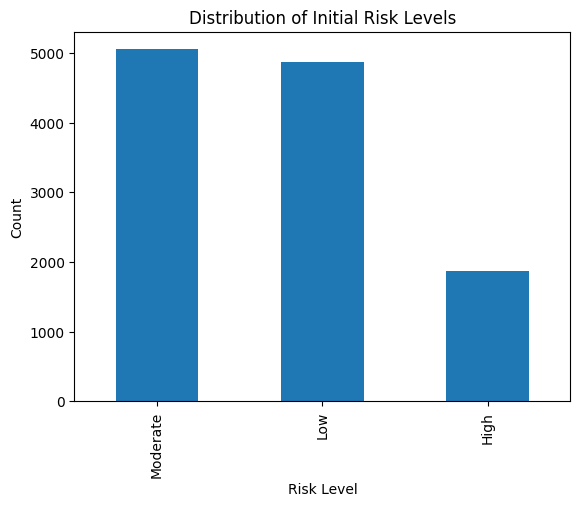

Total records: 11927


In [5]:
mh_sa["risk_level_initial"].value_counts().plot(kind='bar')
plt.title("Distribution of Initial Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()
total_records = len(mh_sa)
print(f"Total records: {total_records}")

In [6]:
# --- Read and normalize ---
srs_path = "~/Sue Goldie Dropbox/Jacob Jameson/DBH data/MH SRS.xlsx"
srs = pd.read_excel(srs_path)
srs.columns = (
    srs.columns.str.strip().str.lower()
    .str.replace(r"[^\w]+", "_", regex=True)
)

# --- Rename exactly as in your R ---
srs = srs.rename(columns={
    "evaluation_date": "final_eval_date",
    "master_id": "masterid",
    "admission_date": "admit_date",
    "discharge_date": "discharge_date",
    "final_b_risk_level_b_including_any_change_based_on_clinical_judgment_if_applicable_u_": "raw_risk_level",
    "documentation_follow_up_create_resolve_urgent_issue_red_flag_in_emr_high_risk_": "high_risk_flag1",
    "documentation_follow_up_create_suicide_risk_treatment_plan_high_risk_": "high_risk_flag2",
    "documentation_follow_up_include_suicide_risk_reduction_interventions_in_appropriate_treatment_plan_moderate_risk_": "moderate_risk_flag",
    "documentation_follow_up_n_a_only_applicable_if_low_risk_": "low_risk_flag",
})

# --- Types ---
srs["final_eval_date"] = pd.to_datetime(srs["final_eval_date"], errors="coerce")
srs["admit_date"]      = pd.to_datetime(srs["admit_date"], errors="coerce")
srs["discharge_date"]  = pd.to_datetime(srs["discharge_date"], errors="coerce")

def yes_flag(x):
    if pd.isna(x): return False
    return str(x).strip().lower() in {"true","t","yes","y","1"}

for c in ["high_risk_flag1","high_risk_flag2","moderate_risk_flag","low_risk_flag"]:
    srs[c] = srs.get(c, pd.Series(False, index=srs.index)).map(yes_flag)

# --- Map raw risk text → Low/Moderate/High (RISK_LEVEL_MAPPINGS) ---
txt = srs["raw_risk_level"].astype(str).str.strip().str.lower()
map_dict = {
    "low suicide risk": "Low",
    "moderate suicide risk": "Moderate",
    "high suicide risk": "High",
}
srs["initial_risk_level"] = txt.map(map_dict).astype("object")

# --- Flag-based risk (priority: High > Moderate > Low) with object dtype ---
flag_based = pd.Series(pd.NA, index=srs.index, dtype="object")
flag_based = flag_based.mask(srs["low_risk_flag"], "Low")
flag_based = flag_based.mask(srs["moderate_risk_flag"], "Moderate")
flag_based = flag_based.mask(srs["high_risk_flag1"] | srs["high_risk_flag2"], "High")
srs["flag_based_risk"] = flag_based

# --- Coalesce exactly like R ---
srs["risk_level"] = srs["initial_risk_level"].where(srs["initial_risk_level"].notna(), srs["flag_based_risk"])
srs["risk_level"] = pd.Categorical(srs["risk_level"], categories=["Low","Moderate","High"], ordered=True)

# --- Drop helpers and sort, matching R intent ---
srs = srs.drop(columns=["raw_risk_level","high_risk_flag1","high_risk_flag2","moderate_risk_flag","low_risk_flag",
                        "initial_risk_level","flag_based_risk"])
srs = srs.sort_values(["masterid","admit_date","final_eval_date"])

# Quick check
print(srs["risk_level"].value_counts(dropna=False))
print(srs[["masterid","admit_date","final_eval_date","risk_level"]].head())

srs = srs[["masterid", "admit_date", "discharge_date", "final_eval_date", "risk_level"]]

risk_level
Low         10806
Moderate    10550
High         4023
NaN           604
Name: count, dtype: int64
                                   masterid admit_date     final_eval_date  \
8017   0009f7ed-2349-4f4a-9b04-9b194ff434ea 2023-08-29 2023-09-01 14:25:00   
17430  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-23 14:10:00   
17440  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-28 20:08:00   
17434  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-29 15:05:00   
17435  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22 2021-03-30 14:18:00   

      risk_level  
8017         Low  
17430        Low  
17440       High  
17434       High  
17435       High  


In [7]:
# --- Ensure consistent types ---
for df in [mh_sa]:
    df["admit_date"] = pd.to_datetime(df["admit_date"], errors="coerce")
    df["discharge_date"] = pd.to_datetime(df["discharge_date"], errors="coerce")
    df["risk_level_initial"] = pd.Categorical(df["risk_level_initial"],
                                              categories=["Low","Moderate","High"], ordered=True)

srs["final_eval_date"] = pd.to_datetime(srs["final_eval_date"], errors="coerce")
srs["admit_date"]      = pd.to_datetime(srs["admit_date"], errors="coerce")
srs["discharge_date"]  = pd.to_datetime(srs["discharge_date"], errors="coerce")
srs["risk_level"]      = pd.Categorical(srs["risk_level"],
                                        categories=["Low","Moderate","High"], ordered=True)

# --- Merge initial risk into SRS (scores) ---
scores = mh_sa.loc[:, ["masterid","admit_date","risk_level_initial"]].copy()
srs = srs.merge(scores, on=["masterid","admit_date"], how="left")

# --- Compute days_to_first_drop and days_until_low (faithful to R) ---
def add_drop_metrics(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("final_eval_date")
    admit = g["admit_date"].iloc[0]
    init  = g["risk_level_initial"].iloc[0]

    # days_until_low
    low_mask = (g["risk_level"] == "Low")
    if low_mask.any():
        first_low_date = g.loc[low_mask, "final_eval_date"].iloc[0]
        days_until_low = (first_low_date - admit).days
    else:
        days_until_low = pd.NA

    # days_to_first_drop: first time risk < initial
    if pd.isna(init):
        days_to_first_drop = pd.NA
    else:
        init_code = pd.Categorical([init], categories=["Low","Moderate","High"], ordered=True).codes[0]
        risk_codes = g["risk_level"].cat.codes  # -1 for NaN
        drop_mask = risk_codes < init_code
        if (drop_mask & (risk_codes != -1)).any():
            first_drop_date = g.loc[drop_mask, "final_eval_date"].iloc[0]
            days_to_first_drop = (first_drop_date - admit).days
        else:
            days_to_first_drop = pd.NA

        # If initial == Low, replace with days_until_low when available (R line)
        if init == "Low" and not pd.isna(days_until_low):
            days_to_first_drop = days_until_low

    g["days_to_first_drop"] = days_to_first_drop
    g["days_until_low"] = days_until_low
    return g

srs = srs.groupby(["masterid","admit_date"], group_keys=False).apply(add_drop_metrics)

# --- Keep most recent rescreen per episode, add counts ---
srs = srs.sort_values(["masterid","admit_date","final_eval_date"], ascending=[True, True, False]).copy()
srs["rescreens"] = srs.groupby(["masterid","admit_date"])["final_eval_date"].transform("size")
srs_last = srs.groupby(["masterid","admit_date"], as_index=False).head(1).copy()

# --- Final fields and durations ---
srs_last = srs_last.rename(columns={"risk_level": "risk_level_discharge"})
srs_last["admit_to_last_cssrs"] = (srs_last["final_eval_date"] - srs_last["admit_date"]).dt.days
srs_last["cssrs_to_discharge"]  = (srs_last["discharge_date"] - srs_last["final_eval_date"]).dt.days

# --- Merge back to mh_sa as in R (by masterid, admit_date, discharge_date, risk_level_initial) ---
sa = srs_last.merge(
    mh_sa,
    on=["masterid","admit_date","discharge_date","risk_level_initial"],
    how="left"
).sort_values(["masterid","admit_date"])

# Quick sanity checks
print(sa[["risk_level_initial","risk_level_discharge"]].value_counts(dropna=False).head())
print(sa[["rescreens","days_to_first_drop","days_until_low","admit_to_last_cssrs","cssrs_to_discharge"]].describe(include="all"))

risk_level_initial  risk_level_discharge
Moderate            Low                     3583
High                Low                     1164
Low                 Low                      962
Moderate            Moderate                 534
High                Moderate                 314
Name: count, dtype: int64
          rescreens  days_to_first_drop  days_until_low  admit_to_last_cssrs  \
count   7733.000000              6667.0          6531.0          7733.000000   
unique          NaN               120.0           134.0                  NaN   
top             NaN                 1.0             7.0                  NaN   
freq            NaN              1114.0           814.0                  NaN   
mean       3.545972                 NaN             NaN            28.143282   
std        4.278897                 NaN             NaN            31.317239   
min        1.000000                 NaN             NaN           -22.000000   
25%        1.000000                 NaN         

In [8]:
import plotly.graph_objects as go
import plotly.io as pio

# --- Order: top → bottom
risk_order = ["High", "Moderate", "Low"]

# Build flows from sa
df = sa.loc[
    sa["risk_level_initial"].isin(risk_order) & sa["risk_level_discharge"].isin(risk_order),
    ["risk_level_initial","risk_level_discharge"]
].copy()

flows = (
    df.groupby(["risk_level_initial","risk_level_discharge"])
      .size().reset_index(name="count")
)
total = int(flows["count"].sum())
flows["pct_total"] = flows["count"] / total
flows["pct_within_initial"] = flows["count"] / flows.groupby("risk_level_initial")["count"].transform("sum")

# Node labels and indices
left_labels  = [f"{c} (initial)"   for c in risk_order]
right_labels = [f"{c} (discharge)" for c in risk_order]
nodes = left_labels + right_labels
idx = {c:i for i,c in enumerate(risk_order)}

flows["source"] = flows["risk_level_initial"].map(idx).astype(int)
flows["target"] = flows["risk_level_discharge"].map(lambda c: idx[c] + len(risk_order)).astype(int)
flows["value"]  = flows["count"].astype(float)

# Colors
risk_rgb = {"Low":"rgba(44,160,44,0.70)","Moderate":"rgba(255,127,14,0.70)","High":"rgba(214,39,40,0.70)"}
node_colors = [risk_rgb[c] for c in risk_order] + [risk_rgb[c] for c in risk_order]
link_colors = flows["risk_level_initial"].astype(str).map({
    "Low":"rgba(44,160,44,0.35)","Moderate":"rgba(255,127,14,0.35)","High":"rgba(214,39,40,0.35)"
}).tolist()

# Hover text
flows["hover"] = (
    flows["risk_level_initial"].astype(str) + " → " + flows["risk_level_discharge"].astype(str) +
    "<br><b>n = " + flows["count"].map("{:,}".format) + "</b>" +
    "<br>% of total = " + (100*flows["pct_total"]).round(1).astype(str) + "%" +
    "<br>% within initial = " + (100*flows["pct_within_initial"]).round(1).astype(str) + "%"
)

# Fix node positions: High top, Moderate middle, Low bottom
x_left,  x_right = [0.10]*3, [0.90]*3
y_left,  y_right = [0.05, 0.50, 0.95], [0.05, 0.50, 0.95]  # High, Moderate, Low

fig = go.Figure(data=[go.Sankey(
    arrangement="fixed",
    node=dict(
        pad=20, thickness=20,
        line=dict(color="rgba(0,0,0,0.25)", width=0.6),
        label=nodes, color=node_colors,
        x=x_left + x_right, y=y_left + y_right
    ),
    link=dict(
        source=flows["source"].tolist(),
        target=flows["target"].tolist(),
        value=flows["value"].tolist(),
        color=link_colors,
        hovertemplate="%{customdata}<extra></extra>",
        customdata=flows["hover"].tolist()
    )
)])

# Wider canvas and larger margins to avoid cutoff
fig.update_layout(
    title=f"Initial → Discharge Suicide Risk Flow (n={total:,})",
    font=dict(size=13),
    width=1200, height=620,
    margin=dict(l=0, r=80, t=80, b=130),
)

fig.show()

# --- Static export (PNG/SVG) ---
# pip install -q kaleido  # run once in your env
# Save high-res PNG
#pio.write_image(fig, "risk_sankey.png", format="png", scale=2, width=1100, height=620)
# Or vector SVG
#pio.write_image(fig, "risk_sankey.svg", format="svg", width=1100, height=620)

In [10]:
import re

pn_path = "~/Sue Goldie Dropbox/Jacob Jameson/DBH data/MH PN.xlsx"
pn = pd.read_excel(pn_path)
pn.columns = (
    pn.columns.str.strip().str.lower()
      .str.replace(r"[^\w]+", "_", regex=True)
)

# Dates
pn = pn.rename(columns={"evaluation_date": "pn_eval_date", "master_id": "masterid"})
pn["pn_eval_date"] = pd.to_datetime(pn["pn_eval_date"], errors="coerce")

# Therapist name = text before first comma in staff_signature_1
def extract_name(x):
    if pd.isna(x): return pd.NA
    m = re.match(r"\s*([^,]+)\s*,", str(x))
    return m.group(1).strip() if m else str(x).strip()

pn["therapist_name"] = pn.get("staff_signature_1", pd.Series(index=pn.index, dtype="object")).map(extract_name)

In [97]:
# --- bring in admit/discharge windows from sa ---
episodes = sa[["masterid","admit_date","discharge_date"]].drop_duplicates()

# ensure proper datetime
episodes["admit_date"] = pd.to_datetime(episodes["admit_date"], errors="coerce")
episodes["discharge_date"] = pd.to_datetime(episodes["discharge_date"], errors="coerce")

# --- join pn to all episodes for same masterid ---
pn_with_dates = pn.merge(episodes, on="masterid", how="left")

# keep only rows where the PN falls between admit and discharge
pn_with_dates = pn_with_dates[
    (pn_with_dates["pn_eval_date"] >= pn_with_dates["admit_date"]) &
    (pn_with_dates["pn_eval_date"] <= pn_with_dates["discharge_date"])
].copy()

print(pn_with_dates[["masterid","pn_eval_date","admit_date","discharge_date","therapist_name"]].head())
print(f"Rows after filtering: {len(pn_with_dates)}")

                               masterid        pn_eval_date admit_date  \
0  382932a1-999f-46bd-87c5-6ebb0bc680b0 2021-06-01 13:11:00 2021-05-13   
1  c811d635-148d-4c98-b763-59954eeff3db 2022-09-29 10:36:00 2022-09-20   
2  7183eca4-b61f-44e8-9d02-10664133f4e8 2022-10-20 11:46:00 2022-10-10   
4  18505ea2-f098-4157-8663-b79e9f6aae8a 2023-02-21 11:43:00 2023-02-10   
8  370a7233-cf41-4cb1-ae4c-b8458176ff4d 2021-02-03 14:30:00 2020-12-31   

  discharge_date    therapist_name  
0     2021-06-03        Maria Aziz  
1     2022-12-12     Aleshea Jones  
2     2022-11-15                    
4     2023-06-30                    
8     2021-03-26  Takeesha Hawkins  
Rows after filtering: 90890


In [98]:
# --- keep only the first PN per (masterid, admit_date, discharge_date) ---
first_pn = (
    pn_with_dates
    .sort_values(["masterid", "admit_date", "pn_eval_date"])  # order chronologically
    .groupby(["masterid", "admit_date", "discharge_date"], as_index=False)
    .first()  # take the first row in each episode
)

# keep only relevant fields
first_pn = first_pn[[
    "masterid",
    "admit_date",
    "discharge_date",
    "pn_eval_date",
    "therapist_name",
    # modalities of interest
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_"
]]

print(first_pn.head())
print(f"First-session rows: {len(first_pn)}")

                               masterid admit_date discharge_date  \
0  0009f7ed-2349-4f4a-9b04-9b194ff434ea 2023-08-29     2023-09-18   
1  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22     2021-05-10   
2  00178ab1-b7ac-43b2-a190-94924191948a 2022-05-26     2022-07-06   
3  001988a9-62ae-4ce0-a1a2-84e8c7be1f48 2022-11-29     2023-02-17   
4  001ef185-374e-4052-8f0d-5b7665f9de9c 2022-08-10     2022-09-30   

         pn_eval_date          therapist_name  \
0 2023-09-01 11:00:00            Tianna McIff   
1 2021-03-23 11:30:00        Jessica Yukihiro   
2 2022-06-01 11:30:00          Martha Ramirez   
3 2022-12-08 14:30:00  Lola (Sarah) Schwitkis   
4 2022-08-12 12:30:00        Delphine Chollet   

   evidence_based_modalities_employed_act  \
0                                     0.0   
1                                     NaN   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   evidence_based_m

In [99]:
# --- Merge first-session PN data into SA data ---
final = (
    sa.merge(
        first_pn,
        on=["masterid", "admit_date", "discharge_date"],  # align within episodes
        how="left"  # keep all SA episodes, even if no PN found
    )
)

print(final.head())
print(final.shape)

# Quick check: how many episodes have first-session data attached?
print(final["therapist_name"].notna().mean(), "proportion with PN info")

                               masterid admit_date discharge_date  \
0  0009f7ed-2349-4f4a-9b04-9b194ff434ea 2023-08-29     2023-09-18   
1  0017845c-4257-4808-ae41-a47c6fa9db60 2021-03-22     2021-05-10   
2  00178ab1-b7ac-43b2-a190-94924191948a 2022-05-26     2022-07-06   
3  001988a9-62ae-4ce0-a1a2-84e8c7be1f48 2022-11-29     2023-02-17   
4  001ef185-374e-4052-8f0d-5b7665f9de9c 2022-08-10     2022-09-30   

      final_eval_date risk_level_discharge risk_level_initial  \
0 2023-09-01 14:25:00                  Low           Moderate   
1 2021-04-29 14:33:00                  Low               High   
2 2022-07-05 15:26:00                  Low           Moderate   
3 2022-12-27 15:24:00                  Low           Moderate   
4 2022-09-27 12:37:00             Moderate           Moderate   

  days_to_first_drop days_until_low  rescreens  admit_to_last_cssrs  ...  \
0                  3              3          1                    3  ...   
1                  1              1       

In [100]:
therapy_cols = [
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_",
]

# Convert NaN → 0, then cast to int
final[therapy_cols] = final[therapy_cols].fillna(0).astype(int)

print(final[therapy_cols].dtypes)
print(final[therapy_cols].head())

evidence_based_modalities_employed_act                                     int64
evidence_based_modalities_employed_cbt                                     int64
evidence_based_modalities_employed_dbt                                     int64
evidence_based_modalities_employed_motivational_interviewing               int64
evidence_based_modalities_employed_mindfulness_techniques                  int64
evidence_based_modalities_employed_stages_of_change                        int64
evidence_based_modalities_employed_family_systems                          int64
evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_    int64
dtype: object
   evidence_based_modalities_employed_act  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   evidence_based_modalities_employed_cbt  \
0                     

In [101]:
# filter out any rows where modalities are not recorded (all zeros)
final = final[final[therapy_cols].sum(axis=1) > 0].copy()
print(f"Rows after filtering out no-therapy: {len(final)}")

Rows after filtering out no-therapy: 5566


In [103]:
# filter out any rows where initial risk is Low
final = final[final["risk_level_initial"] != "Low"].copy()
print(f"Rows after filtering out initial Low risk: {len(final)}")

Rows after filtering out initial Low risk: 4693


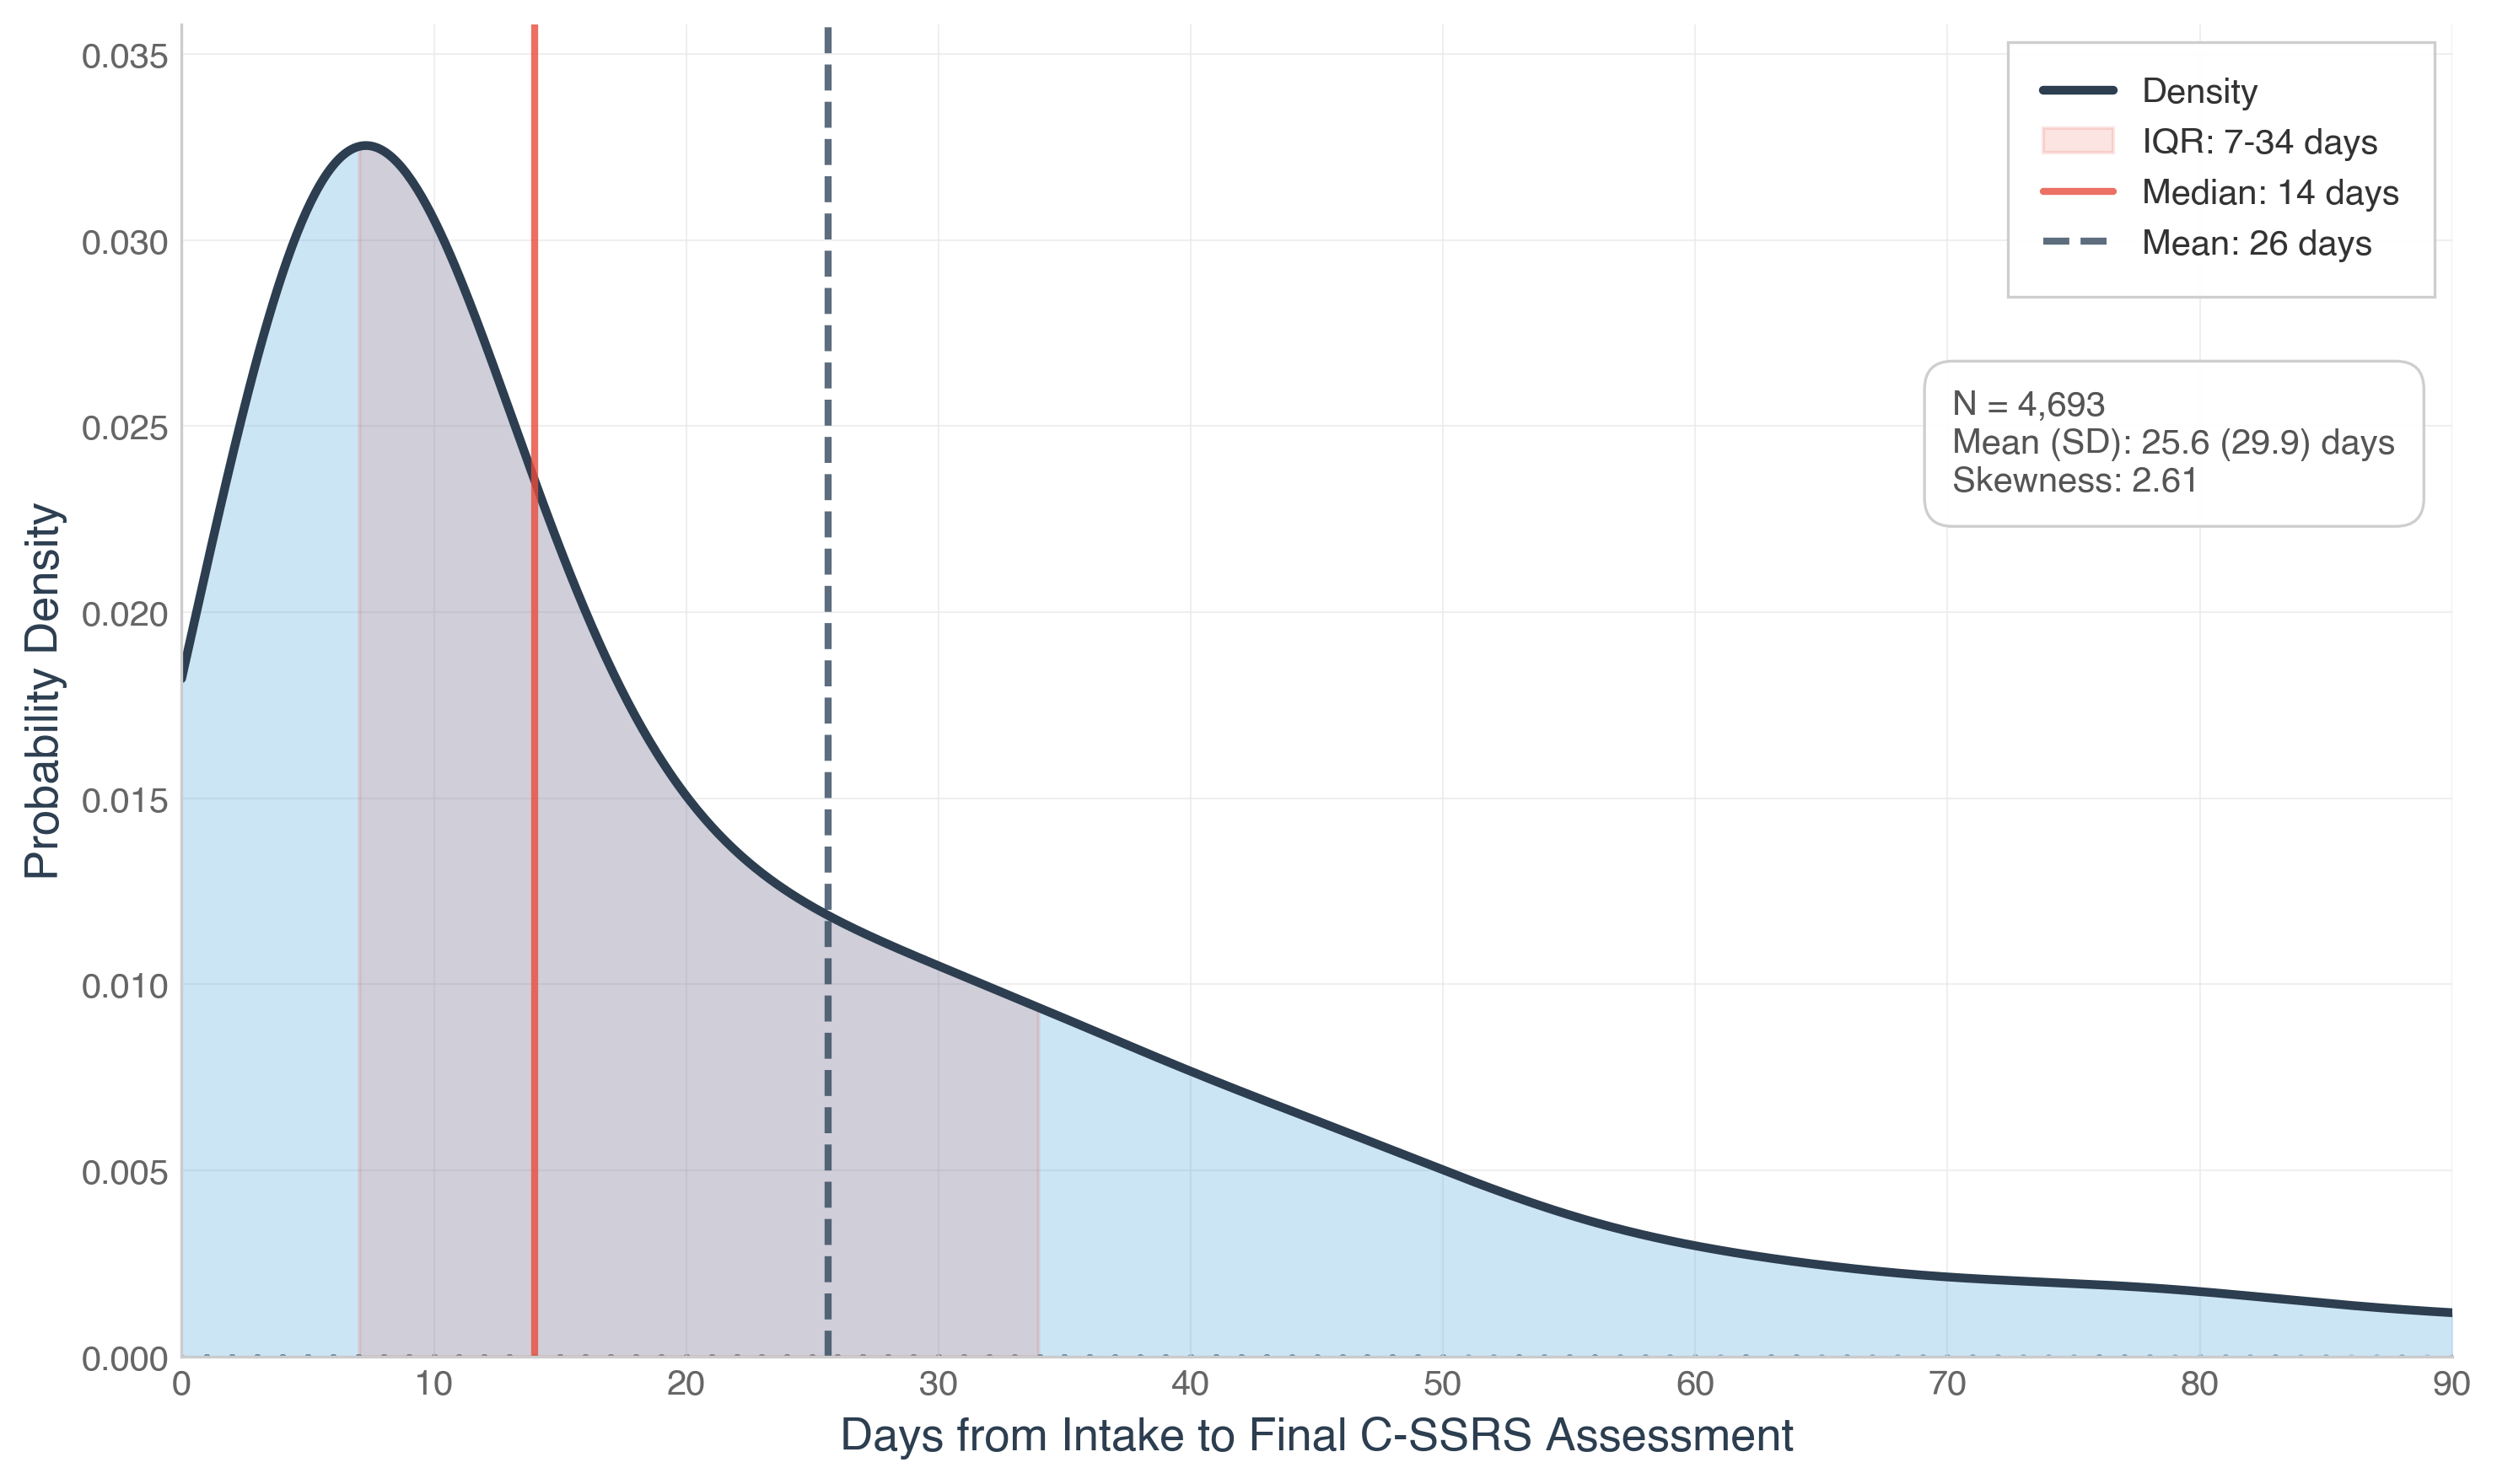

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd

# Set the style to emulate ggplot2
sns.set_style("whitegrid", {
    'axes.edgecolor': '#CCCCCC',
    'axes.linewidth': 0.8,
    'grid.color': '#EBEBEB',
    'grid.linewidth': 1,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white'
})

# Configure for publication quality
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'],
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666'
})

# Prepare data
data = final["admit_to_last_cssrs"].dropna()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Calculate KDE
density = stats.gaussian_kde(data, bw_method='scott')
x_range = np.linspace(0, np.percentile(data, 95) + 10, 1000)
density_values = density(x_range)

# Calculate statistics
q1, median, q3 = data.quantile([0.25, 0.5, 0.75])
mean_val = data.mean()

# Main KDE plot with gradient fill
# Create gradient effect under the curve
ax.fill_between(x_range, 0, density_values, 
                color='#3498db', alpha=0.25, linewidth=0)

# Main density line
ax.plot(x_range, density_values, color='#2c3e50', linewidth=2.5, label='Density')

# Add shaded IQR region
iqr_x = x_range[(x_range >= q1) & (x_range <= q3)]
iqr_y = density(iqr_x)
ax.fill_between(iqr_x, 0, iqr_y, color='#e74c3c', alpha=0.15, 
                label=f'IQR: {q1:.0f}-{q3:.0f} days')

# Add statistical reference lines
ax.axvline(median, color='#e74c3c', linestyle='-', linewidth=2, 
           alpha=0.8, label=f'Median: {median:.0f} days')
ax.axvline(mean_val, color='#34495e', linestyle='--', linewidth=2, 
           alpha=0.8, label=f'Mean: {mean_val:.0f} days')

# Add subtle rug plot at bottom
ax.scatter(data, np.zeros(len(data)) - 0.001 * density_values.max(), 
           color='#7f8c8d', alpha=0.15, s=1, zorder=0)

# Styling
ax.set_xlabel('Days from Intake to Final C-SSRS Assessment', 
              fontsize=13, color='#2c3e50', fontweight='medium')
ax.set_ylabel('Probability Density', 
              fontsize=13, color='#2c3e50', fontweight='medium')

# Set limits
ax.set_xlim(0, np.percentile(data, 95) + 5)
ax.set_ylim(0, density_values.max() * 1.1)

# Customize grid
ax.grid(True, linestyle='-', linewidth=0.5, color='#EBEBEB', alpha=0.8)
ax.set_axisbelow(True)

# Spines customization (ggplot-style)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color('#CCCCCC')
    ax.spines[spine].set_linewidth(0.8)

# Tick customization
ax.tick_params(colors='#666666', which='both', length=0)

# Legend with custom styling
legend = ax.legend(loc='upper right', frameon=True, fancybox=False, 
                   shadow=False, borderpad=1, columnspacing=1)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#CCCCCC')
legend.get_frame().set_linewidth(0.8)
legend.get_frame().set_alpha(0.95)

# Add sample size and statistics annotation
stats_text = f'N = {len(data):,}\nMean (SD): {mean_val:.1f} ({data.std():.1f}) days\nSkewness: {stats.skew(data):.2f}'
ax.text(0.78, 0.65, stats_text, transform=ax.transAxes,
        fontsize=10, color='#555555',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', 
                  edgecolor='#CCCCCC', linewidth=0.8, alpha=0.95))

# Title (optional - remove for journal submission)
# ax.set_title('Distribution of Time to Last Suicide Risk Assessment', 
#              fontsize=14, color='#2c3e50', fontweight='bold', pad=20)

# Optimize layout
plt.tight_layout()

# Display
plt.show()

# Save in high quality
# plt.savefig('cssrs_distribution_kde.pdf', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('cssrs_distribution_kde.png', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('cssrs_distribution_kde.svg', bbox_inches='tight', facecolor='white')

In [105]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators

# --- 1. Define therapy columns and labels ---
therapy_cols = [
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_",
]

therapy_labels = {
    therapy_cols[0]: "ACT",
    therapy_cols[1]: "CBT",
    therapy_cols[2]: "DBT",
    therapy_cols[3]: "MI",
    therapy_cols[4]: "Mindfulness",
    therapy_cols[5]: "Stages of Change",
    therapy_cols[6]: "Family Systems",
    therapy_cols[7]: "Trauma-Informed",
}

# --- 2. Filter to valid rows and rename ---
filtered = final.loc[
    final["risk_level_initial"].notna()
    & final["risk_level_discharge"].notna()
    & (final[therapy_cols].sum(axis=1) > 0),
    therapy_cols
].rename(columns=therapy_labels)

# Ensure boolean
filtered = filtered.astype(bool)

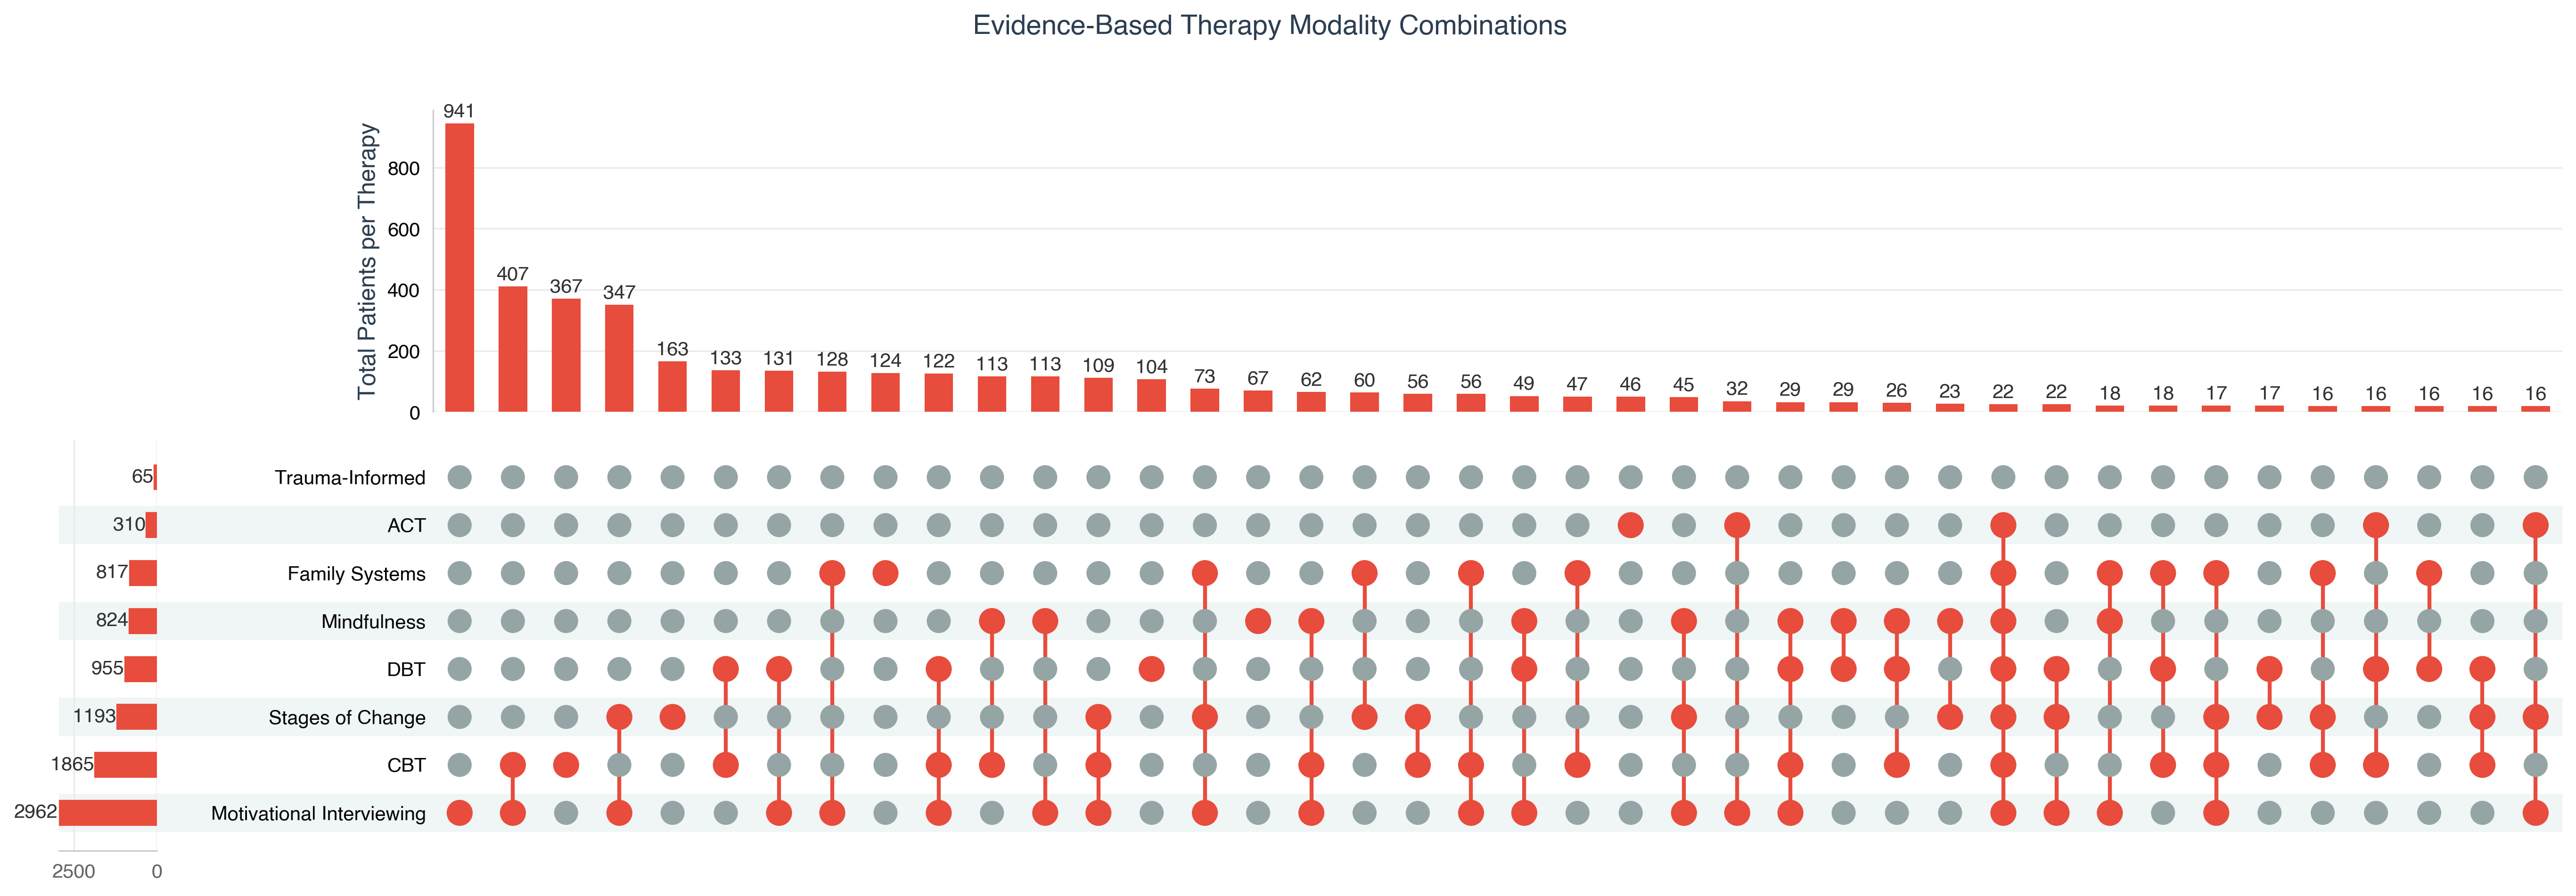

<Figure size 1920x1440 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
import numpy as np
import seaborn as sns

# Set up the style for publication quality
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'],
    'font.size': 10,
    'axes.linewidth': 0.8,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#666666',
    'ytick.color': "#090707",
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# --- 1. Define therapy columns and labels ---
therapy_cols = [
    "evidence_based_modalities_employed_act",
    "evidence_based_modalities_employed_cbt",
    "evidence_based_modalities_employed_dbt",
    "evidence_based_modalities_employed_motivational_interviewing",
    "evidence_based_modalities_employed_mindfulness_techniques",
    "evidence_based_modalities_employed_stages_of_change",
    "evidence_based_modalities_employed_family_systems",
    "evidence_based_modalities_employed_trauma_informed_strategies_inc_emdr_",
]

therapy_labels = {
    therapy_cols[0]: "ACT",
    therapy_cols[1]: "CBT",
    therapy_cols[2]: "DBT",
    therapy_cols[3]: "Motivational Interviewing",
    therapy_cols[4]: "Mindfulness",
    therapy_cols[5]: "Stages of Change",
    therapy_cols[6]: "Family Systems",
    therapy_cols[7]: "Trauma-Informed",
}

# --- 2. Filter to valid rows and rename ---
filtered = final.loc[
    final["risk_level_initial"].notna()
    & final["risk_level_discharge"].notna()
    & (final[therapy_cols].sum(axis=1) > 0),
    therapy_cols
].rename(columns=therapy_labels)

# Ensure boolean
filtered = filtered.astype(bool)

# --- 3. Create the UpSet data structure ---
upset_data = from_indicators(filtered)

# --- 4. Create the UpSet plot with custom styling ---
fig = plt.figure(figsize=(14, 8), facecolor='white', dpi=300)

# Initialize UpSet with custom parameters
upset = UpSet(
    upset_data,
    subset_size='count',
    intersection_plot_elements=6,  # Show more intersections
    min_subset_size=15,  # Only show combinations with at least 10 patients
    min_degree=1,  # Show single therapies too
    max_degree=None,  # No maximum
    sort_by='cardinality',  # Sort by frequency
    sort_categories_by='cardinality',  # Sort categories by total frequency
    facecolor='#e74c3c',  # Nice red color for bars
    shading_color="#f0f5f6",  # Light gray for matrix
    other_dots_color='#95a5a6',  # Gray for inactive dots
    element_size=35,  # Size of the matrix dots
    show_counts=True,  # Show counts on bars
    show_percentages=False,  # Can change to True if you want percentages
)

# Plot with custom styling
axes = upset.plot(fig=fig)

# Customize the intersection size plot (main bar chart)
for ax in fig.axes:
    # Style the bar chart
    if hasattr(ax, 'set_xlabel'):
        if ax.get_xlabel() == 'Intersection size' or 'size' in ax.get_xlabel().lower():
            ax.set_xlabel('Number of Patients', fontsize=12, fontweight='medium', color='#2c3e50')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('#CCCCCC')
            ax.spines['bottom'].set_color('#CCCCCC')
            ax.grid(True, axis='y', linestyle='-', linewidth=0.5, color='#EBEBEB', alpha=0.8)
            ax.set_axisbelow(True)
            
            # Add value labels on top of bars (if not too many)
            bars = [child for child in ax.get_children() if isinstance(child, plt.Rectangle)]
            for bar in bars[:20]:  # Only label first 20 bars to avoid clutter
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=8, color='#666666')
    
    # Style the totals plot (side bar chart)
    if hasattr(ax, 'set_ylabel'):
        if ax.get_ylabel() == 'Set size' or 'size' in ax.get_ylabel().lower():
            ax.set_ylabel('Total Patients per Therapy', fontsize=12, fontweight='medium', color='#2c3e50')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('#CCCCCC')
            ax.spines['bottom'].set_color('#CCCCCC')
            ax.grid(True, axis='x', linestyle='-', linewidth=0.5, color='#EBEBEB', alpha=0.8)
            ax.set_axisbelow(True)

# Add a title
fig.suptitle('Evidence-Based Therapy Modality Combinations', 
             fontsize=14, fontweight='bold', color='#2c3e50', y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display
plt.show()

# Save options
plt.savefig('../outputs/therapy_combinations_upset.png', dpi=300, bbox_inches='tight', facecolor='white')

In [27]:
final = final.loc[
    final["risk_level_initial"].notna()
    & final["risk_level_discharge"].notna()
    & (final[therapy_cols].sum(axis=1) > 0)
].rename(columns=therapy_labels)

final

,masterid,admit_date,discharge_date,final_eval_date,risk_level_discharge,risk_level_initial,days_to_first_drop,days_until_low,rescreens,admit_to_last_cssrs,...,pn_eval_date,therapist_name,ACT,CBT,DBT,Motivational Interviewing,Mindfulness,Stages of Change,Family Systems,Trauma-Informed
0,0009f7ed-2349-4f4a-9b04-9b194ff434ea,2023-08-29,2023-09-18,2023-09-01 14:25:00,Low,Moderate,3,3,1,3,...,2023-09-01 11:00:00,Tianna McIff,0,0,1,1,1,0,0,0
2,00178ab1-b7ac-43b2-a190-94924191948a,2022-05-26,2022-07-06,2022-07-05 15:26:00,Low,Moderate,7,7,3,40,...,2022-06-01 11:30:00,Martha Ramirez,0,0,0,1,0,0,0,0
3,001988a9-62ae-4ce0-a1a2-84e8c7be1f48,2022-11-29,2023-02-17,2022-12-27 15:24:00,Low,Moderate,28,28,1,28,...,2022-12-08 14:30:00,Lola (Sarah) Schwitkis,0,0,0,1,0,0,1,0
4,001ef185-374e-4052-8f0d-5b7665f9de9c,2022-08-10,2022-09-30,2022-09-27 12:37:00,Moderate,Moderate,23,23,8,48,...,2022-08-12 12:30:00,Delphine Chollet,0,0,0,0,1,0,0,0
5,0028f28c-4a54-40df-8551-b28640dd4aa2,2023-07-03,2023-08-31,2023-08-31 16:11:00,Low,Moderate,7,7,9,59,...,2023-07-10 15:30:00,Victoria Cole,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,ff75d5c7-629d-4c53-a01c-b57e5754ae7d,2023-01-16,2023-07-06,2023-06-01 16:17:00,Low,High,1,8,15,136,...,2023-01-17 10:00:00,Ruth Nunez,0,1,0,1,0,0,0,0
7728,ffc7f41d-cc84-49fc-af3f-f80567317f2b,2021-12-09,2022-02-04,2021-12-20 15:23:00,Low,High,4,11,3,11,...,2021-12-14 15:00:00,Ashlyn Taylor,0,1,1,0,0,0,0,0
7730,ffddec32-6fcc-461c-9bfa-ce79b838c1dd,2022-02-17,2022-04-29,2022-02-25 15:47:00,Low,Moderate,8,8,1,8,...,2022-02-25 15:30:00,Natalie Jones,0,0,0,1,0,0,0,0
7731,ffe569e8-c1a6-41c7-b4d8-4b78917aa663,2022-03-04,2022-04-18,2022-04-18 16:57:00,Low,Moderate,14,14,5,45,...,2022-03-07 17:30:00,Ashlyn Taylor,0,0,0,1,0,0,0,0


In [28]:
final["improve"] = (final["risk_level_discharge"].cat.codes < final["risk_level_initial"].cat.codes).astype(int)
final["improve"] = final["improve"].astype(int)

final

,masterid,admit_date,discharge_date,final_eval_date,risk_level_discharge,risk_level_initial,days_to_first_drop,days_until_low,rescreens,admit_to_last_cssrs,...,therapist_name,ACT,CBT,DBT,Motivational Interviewing,Mindfulness,Stages of Change,Family Systems,Trauma-Informed,improve
0,0009f7ed-2349-4f4a-9b04-9b194ff434ea,2023-08-29,2023-09-18,2023-09-01 14:25:00,Low,Moderate,3,3,1,3,...,Tianna McIff,0,0,1,1,1,0,0,0,1
2,00178ab1-b7ac-43b2-a190-94924191948a,2022-05-26,2022-07-06,2022-07-05 15:26:00,Low,Moderate,7,7,3,40,...,Martha Ramirez,0,0,0,1,0,0,0,0,1
3,001988a9-62ae-4ce0-a1a2-84e8c7be1f48,2022-11-29,2023-02-17,2022-12-27 15:24:00,Low,Moderate,28,28,1,28,...,Lola (Sarah) Schwitkis,0,0,0,1,0,0,1,0,1
4,001ef185-374e-4052-8f0d-5b7665f9de9c,2022-08-10,2022-09-30,2022-09-27 12:37:00,Moderate,Moderate,23,23,8,48,...,Delphine Chollet,0,0,0,0,1,0,0,0,0
5,0028f28c-4a54-40df-8551-b28640dd4aa2,2023-07-03,2023-08-31,2023-08-31 16:11:00,Low,Moderate,7,7,9,59,...,Victoria Cole,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,ff75d5c7-629d-4c53-a01c-b57e5754ae7d,2023-01-16,2023-07-06,2023-06-01 16:17:00,Low,High,1,8,15,136,...,Ruth Nunez,0,1,0,1,0,0,0,0,1
7728,ffc7f41d-cc84-49fc-af3f-f80567317f2b,2021-12-09,2022-02-04,2021-12-20 15:23:00,Low,High,4,11,3,11,...,Ashlyn Taylor,0,1,1,0,0,0,0,0,1
7730,ffddec32-6fcc-461c-9bfa-ce79b838c1dd,2022-02-17,2022-04-29,2022-02-25 15:47:00,Low,Moderate,8,8,1,8,...,Natalie Jones,0,0,0,1,0,0,0,0,1
7731,ffe569e8-c1a6-41c7-b4d8-4b78917aa663,2022-03-04,2022-04-18,2022-04-18 16:57:00,Low,Moderate,14,14,5,45,...,Ashlyn Taylor,0,0,0,1,0,0,0,0,1


In [29]:
demo_path = "~/Sue Goldie Dropbox/Jacob Jameson/DBH data/demo.xlsx"
demo = pd.read_excel(demo_path)
demo.columns = (
    demo.columns.str.strip().str.lower()
      .str.replace(r"[^\w]+", "_", regex=True)
)
# rename for consistency
demo = demo.rename(columns={
    "master_id": "masterid",
    "admissiondate": "admit_date",
    "dischargedate": "discharge_date",
    "agegroup": "agegroup",
    'program': 'program',
    'sex_fs': 'sex_fs',
    'location': 'location',
    'prim_mh_dx': 'prim_mh_dx',
    'dx_code': 'dx_code'
})

demo = demo[["masterid", "admit_date", "discharge_date", 
             "agegroup", "sex_fs", "prim_mh_dx", "dx_code", "program", "location"]]

final = final.merge(demo, on=["masterid", "admit_date", "discharge_date"], how="left")
final

,masterid,admit_date,discharge_date,final_eval_date,risk_level_discharge,risk_level_initial,days_to_first_drop,days_until_low,rescreens,admit_to_last_cssrs,...,Stages of Change,Family Systems,Trauma-Informed,improve,agegroup,sex_fs,prim_mh_dx,dx_code,program,location
0,0009f7ed-2349-4f4a-9b04-9b194ff434ea,2023-08-29,2023-09-18,2023-09-01 14:25:00,Low,Moderate,3,3,1,3,...,0,0,0,1,Adult,male,Borderline personality disorder,F60.3; F33.1,RTC,"Shawnee (Adult), KS 3709"
1,00178ab1-b7ac-43b2-a190-94924191948a,2022-05-26,2022-07-06,2022-07-05 15:26:00,Low,Moderate,7,7,3,40,...,0,0,0,1,Adolescent,female,Major depressive disorder,F33.2; F41.1,RTC,"Fresno, CA 3513"
2,001988a9-62ae-4ce0-a1a2-84e8c7be1f48,2022-11-29,2023-02-17,2022-12-27 15:24:00,Low,Moderate,28,28,1,28,...,0,1,0,1,Adolescent,female,Major depressive disorder,F33.2; F43.10; F41.1,OP,"Portland OP, OR 3017"
3,001ef185-374e-4052-8f0d-5b7665f9de9c,2022-08-10,2022-09-30,2022-09-27 12:37:00,Moderate,Moderate,23,23,8,48,...,0,0,0,0,Adolescent,male,Major depressive disorder,F33.3; F41.1; Z62.820; F90.9; F42.2,RTC,"Stamford, CT 3510"
4,0028f28c-4a54-40df-8551-b28640dd4aa2,2023-07-03,2023-08-31,2023-08-31 16:11:00,Low,Moderate,7,7,9,59,...,1,0,0,1,Adolescent,female,Generalized anxiety disorder,F41.1; F33.1,OP,"Temecula OP, CA 3012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610,ff75d5c7-629d-4c53-a01c-b57e5754ae7d,2023-01-16,2023-07-06,2023-06-01 16:17:00,Low,High,1,8,15,136,...,0,0,0,1,Adolescent,female,Major depressive disorder,F33.3; F41.1,OP,"Temecula OP, CA 3012"
4611,ffc7f41d-cc84-49fc-af3f-f80567317f2b,2021-12-09,2022-02-04,2021-12-20 15:23:00,Low,High,4,11,3,11,...,0,0,0,1,Adolescent,male,ADHD,F90.1; F91.3; F43.21,OP,"Virtual OP MH, CA 3016"
4612,ffddec32-6fcc-461c-9bfa-ce79b838c1dd,2022-02-17,2022-04-29,2022-02-25 15:47:00,Low,Moderate,8,8,1,8,...,0,0,0,1,Adolescent,female,Major depressive disorder,F33.2; F41.1,OP,"Sherman Oaks OP, CA 3009"
4613,ffe569e8-c1a6-41c7-b4d8-4b78917aa663,2022-03-04,2022-04-18,2022-04-18 16:57:00,Low,Moderate,14,14,5,45,...,0,0,0,1,Adult,female,Bipolar disorder,F31.81; Z55.9; Z91.5; F50.9; F90.2,OP,"Virtual OP MH, CA 3016"


In [30]:
final["dx_code_list"] = final["dx_code"].dropna().apply(lambda x: [c.strip() for c in x.split(";")])

# 2. Create one-hot encoded DataFrame
dx_dummies = final["dx_code_list"].explode().str.get_dummies().groupby(level=0).max()

# 3. Merge back with main df
final = pd.concat([final, dx_dummies], axis=1)

df_encoded = pd.concat([final, dx_dummies], axis=1)

print(df_encoded.head())

                               masterid admit_date discharge_date  \
0  0009f7ed-2349-4f4a-9b04-9b194ff434ea 2023-08-29     2023-09-18   
1  00178ab1-b7ac-43b2-a190-94924191948a 2022-05-26     2022-07-06   
2  001988a9-62ae-4ce0-a1a2-84e8c7be1f48 2022-11-29     2023-02-17   
3  001ef185-374e-4052-8f0d-5b7665f9de9c 2022-08-10     2022-09-30   
4  0028f28c-4a54-40df-8551-b28640dd4aa2 2023-07-03     2023-08-31   

      final_eval_date risk_level_discharge risk_level_initial  \
0 2023-09-01 14:25:00                  Low           Moderate   
1 2022-07-05 15:26:00                  Low           Moderate   
2 2022-12-27 15:24:00                  Low           Moderate   
3 2022-09-27 12:37:00             Moderate           Moderate   
4 2023-08-31 16:11:00                  Low           Moderate   

  days_to_first_drop days_until_low  rescreens  admit_to_last_cssrs  ...  \
0                  3              3          1                    3  ...   
1                  7              7       

In [32]:
# get values from final for dx
# Define mapping
dx_map = {
    # Depression
    "Major depressive disorder": "Major Depressive Disorder",
    "Major Depressive Disorder": "Major Depressive Disorder",
    "Depressive disorder": "Major Depressive Disorder",
    "Unspecified depressive disorder": "Major Depressive Disorder",
    "Persistent depressive disorder dysthymia": "Dysthymia",

    # Anxiety
    "Generalized anxiety disorder": "Generalized Anxiety Disorder",
    " Generalized anxiety disorder": "Generalized Anxiety Disorder",
    "Social anxiety disorder social phobia": "Social Anxiety Disorder",
    "Specific phobia Other": "Specific Phobia",
    "Panic disorder": "Panic Disorder",
    "Separation anxiety disorder": "Separation Anxiety Disorder",
    "Unspecified anxiety disorder": "Unspecified Anxiety Disorder",

    # Trauma
    "Posttraumatic stress disorder": "PTSD",
    "Unspecified trauma and stressor related disorder": "Trauma/Stress Disorder",
    "Other specified trauma and stressor related disorder": "Trauma/Stress Disorder",
    "Acute stress disorder": "Acute Stress Disorder",
    "Reactive attachment disorder": "Reactive Attachment Disorder",

    # Bipolar
    "Bipolar disorder": "Bipolar Disorder",
    "Unspecified bipolar and related disorder": "Bipolar Disorder",
    "Other specified bipolar and related disorder": "Bipolar Disorder",

    # Psychotic
    "Schizophrenia": "Schizophrenia",
    "Schizoaffective disorder": "Schizoaffective Disorder",
    "Schizophreniform disorder": "Schizophreniform Disorder",
    "Other specified schizophrenia spectrum and other psychotic disorder": "Other Psychotic Disorder",
    "Unspecified schizophrenia spectrum and other psychotic disorder": "Other Psychotic Disorder",

    # Personality
    "Borderline personality disorder": "Borderline Personality Disorder",
    "Dependent personality disorder": "Dependent Personality Disorder",
    "Narcissistic personality disorder": "Narcissistic Personality Disorder",
    "Unspecified personality disorder": "Other Personality Disorder",

    # ADHD/Disruptive
    "ADHD": "ADHD",
    "Unspecified attention deficit hyperactivity disorder": "ADHD",
    "Other specified attention deficit hyperactivity disorder": "ADHD",
    "Disruptive mood dysregulation disorder": "DMDD",
    "Oppositional defiant disorder": "ODD",
    "Conduct disorder": "Conduct Disorder",
    "Unspecified disruptive impulse control and conduct disorder": "Disruptive/Impulse Disorder",
    "Intermittent explosive disorder": "IED",

    # OCD/Dissociative
    "Obsessive compulsive disorder": "OCD",
    "Unspecified obsessive compulsive and related disorder": "OCD",
    "Unspecified dissociative disorder": "Dissociative Disorder",
    "Dissociative identity disorder": "Dissociative Disorder",

    # Substance
    "Cannabis use disorder": "Cannabis Use Disorder",
    "Unspecified bipolar and related disorder F12.20 Cannabis use disorder Moderate": "Cannabis Use Disorder",
    "Amphetamine type substance use disorder ": "Stimulant Use Disorder",
    "Unspecified amphetamine or other stimulant related disorder": "Stimulant Use Disorder",
    "Opioid use disorder": "Opioid Use Disorder",
    "Alcohol use disorde": "Alcohol Use Disorder",
    "Other or unknown substance induced depressive disorde": "Substance-Induced Depressive Disorder",
    "Unspecified other or unknown substance related disorder": "Other Substance Use Disorder",

    # Eating
    "Anorexia nervosa": "Anorexia Nervosa",
    "Unspecified feeding or eating disorder": "Other Eating Disorder",
    "Other specified feeding or eating disorder": "Other Eating Disorder",

    # Misc
    "Autism spectrum disorder": "Autism Spectrum Disorder",
    "Tourette s disorder": "Tourette's Disorder",
    "Parent child relational problem": "Parent-Child Relational Problem",
    "Relationship distress with spouse or intimate partner": "Relationship Distress",
    "Gender dysphoria in adolescents and adults": "Gender Dysphoria",
    "Personal history of self harm": "History of Self-Harm",
    "Suicial Ideation": "Suicidal Ideation",
    "No Dx listed": "No Diagnosis",
}

# Standardize capitalization/whitespace
final["prim_mh_dx_clean"] = (
    final["prim_mh_dx"].str.strip().replace(dx_map)
)

# Optional: lump rare/unmapped into "Other"
final["prim_mh_dx_clean"] = final["prim_mh_dx_clean"].fillna("Other/Unknown")
print(final["prim_mh_dx_clean"].value_counts().head(20))

prim_mh_dx_clean
Major Depressive Disorder          3185
Generalized Anxiety Disorder        390
Bipolar Disorder                    309
PTSD                                241
ADHD                                 79
DMDD                                 60
Autism Spectrum Disorder             40
Borderline Personality Disorder      31
Social Anxiety Disorder              28
OCD                                  27
Dysthymia                            24
Schizoaffective Disorder             24
Adjustment disorde                   22
ODD                                  22
Other/Unknown                        17
Trauma/Stress Disorder               12
Other Psychotic Disorder             11
Unspecified Anxiety Disorder          9
Anorexia Nervosa                      8
Parent-Child Relational Problem       6
Name: count, dtype: int64


In [66]:
final['risk_high_initial'] = (final['risk_level_initial'] == 'High').astype(int)

# Machine Learning babyyyyy

In [75]:
# --- 1. One-hot encode dx_code field into ICD code flags ---
final["dx_code_list"] = final["dx_code"].dropna().apply(
    lambda x: [c.strip() for c in x.split(";")]
)

dx_dummies = (
    final["dx_code_list"]
    .explode()
    .str.get_dummies()
    .groupby(level=0)
    .max()
)

# merge ICD dummies back
final = pd.concat([final, dx_dummies], axis=1)

# capture ICD dummy variable names
icd_dx_cols = dx_dummies.columns.tolist()


# --- 2. Define feature groups ---

# Therapy columns (renamed/cleaned labels you already made)
therapy_cols = [
    "ACT",
    "CBT", 
    "DBT",
    "Motivational Interviewing",
    "Mindfulness",
    "Stages of Change",
    "Family Systems",
    "Trauma-Informed",
]

# Diagnosis categories (broad flags like dx_mood, dx_psychotic, etc.)
dx_cols     = [c for c in final.columns if c.startswith("dx_")]

# Primary diagnosis cleaned one-hots (if you created them, e.g. prim_dx_MDD, prim_dx_GAD)
prim_dx_cols = [c for c in final.columns if c.startswith("prim_dx_")]

# Other groups
symp_cols   = [c for c in final.columns if c.startswith("symp_")]
fam_cols    = [c for c in final.columns if c.startswith("fam_")]
precip_cols = [c for c in final.columns if c.startswith("precip_")]
prot_cols   = [c for c in final.columns if c.startswith("prot_")]


# --- 3. Assemble the modeling dataset ---

model_features = (
    ["risk_high_initial"]   # baseline predictor
    + therapy_cols
    + dx_cols                # broad diagnosis flags
    + prim_dx_cols           # cleaned primary diagnosis one-hots
    + icd_dx_cols            # full ICD code one-hots
    + symp_cols
    + fam_cols
    + precip_cols
    + prot_cols
)

target = "improve"

# explicitly add therapist_name
model_df = final[model_features + ["therapist_name", 'admit_date', target]].copy()

# drop dx_code and dx_code_list (no longer needed)
model_df = model_df.drop(columns=["dx_code", "dx_code_list", '10'], errors="ignore")

# drop dx_code and dx_code_list from model_features if present
model_features = [c for c in model_features if c not in ["dx_code", "dx_code_list", '10']]


# Drop duplicate column names from model_df
model_df = model_df.loc[:, ~model_df.columns.duplicated()].copy()

# Also rebuild patient_features after deduplication
patient_features = [c for c in model_features if c in model_df.columns and c != "therapist_name"]
# take the therapy_cols specifically out of patient_features
patient_features = [c for c in patient_features if c not in therapy_cols]

Using 309 patient features for therapy prediction
Sample features: ['F43.1', 'dx_conduct', 'F43.0', 'F31.89', 'F91.2']
Training size: 3230
Validation size: 1385
ACT: Patient AUC = 0.554, Therapist AUC = 0.681, Combined AUC = 0.666
CBT: Patient AUC = 0.504, Therapist AUC = 0.746, Combined AUC = 0.706
DBT: Patient AUC = 0.534, Therapist AUC = 0.738, Combined AUC = 0.724
MI: Patient AUC = 0.514, Therapist AUC = 0.776, Combined AUC = 0.742
Mindfulness: Patient AUC = 0.534, Therapist AUC = 0.719, Combined AUC = 0.699
Stages of Change: Patient AUC = 0.475, Therapist AUC = 0.766, Combined AUC = 0.732
Family Systems: Patient AUC = 0.583, Therapist AUC = 0.710, Combined AUC = 0.712
Trauma-Informed: Patient AUC = 0.555, Therapist AUC = 0.559, Combined AUC = 0.564


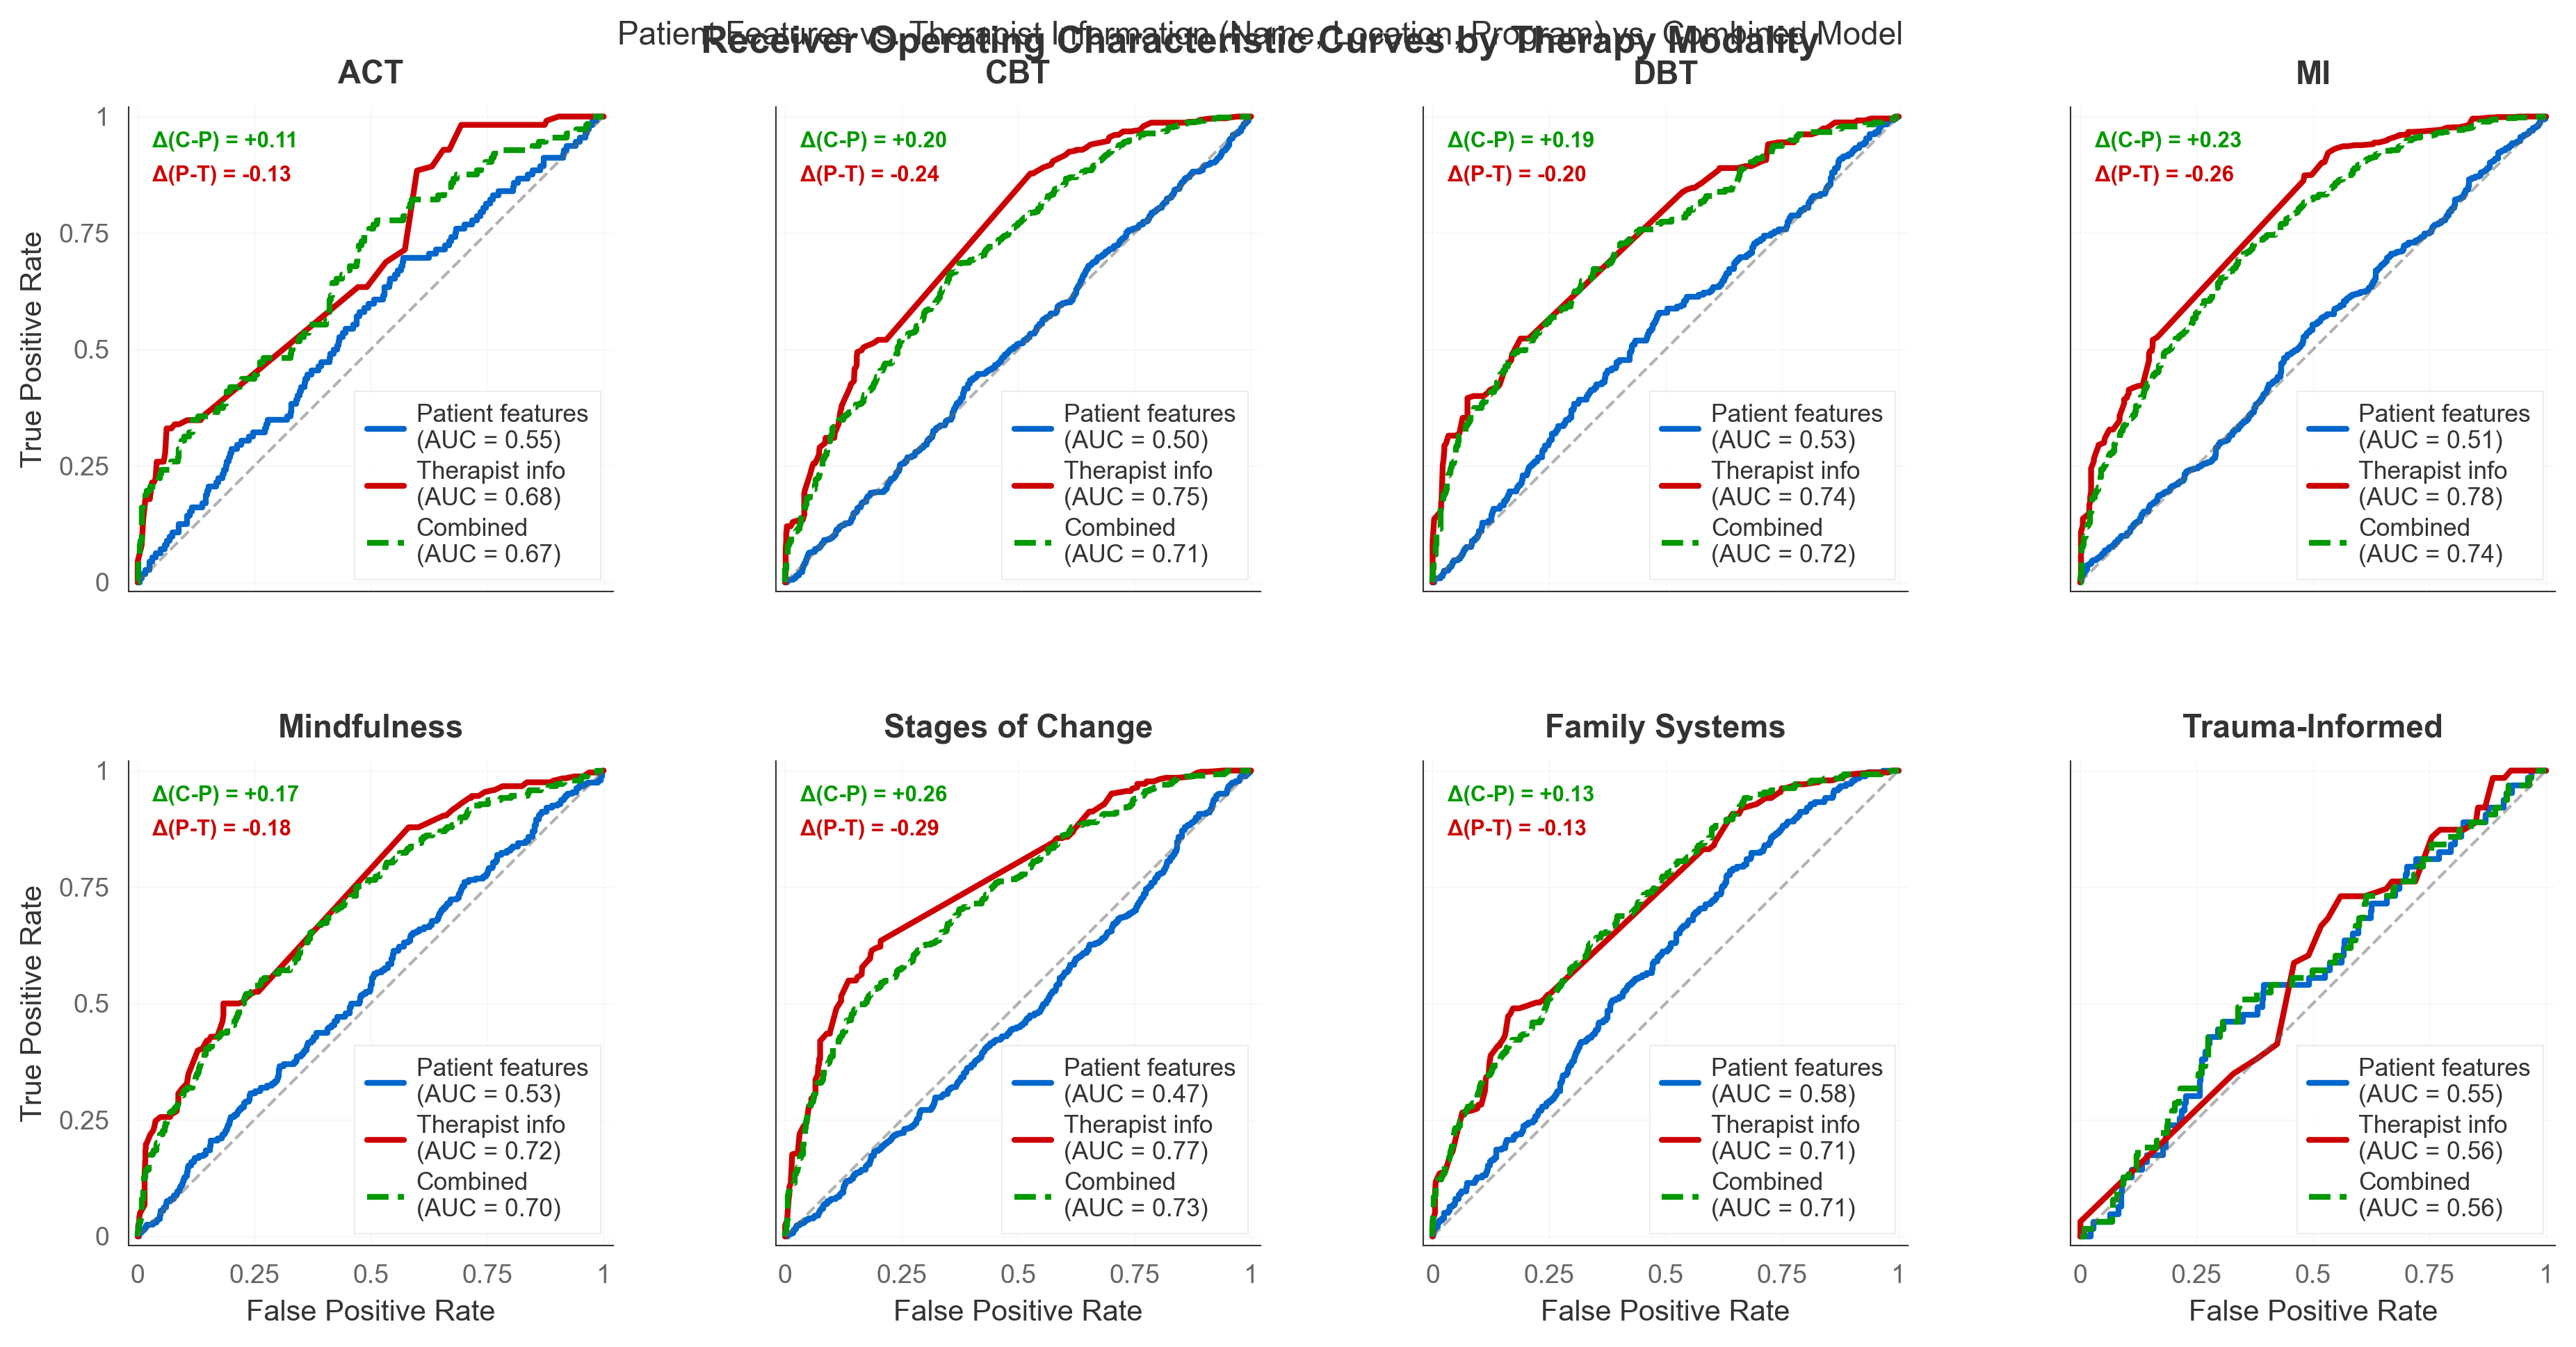

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Set up JAMA publication style
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333'
})

# JAMA-approved color palette
JAMA_COLORS = {
    'primary': '#0066CC',      # Deep blue for patient features
    'secondary': '#CC0000',    # Deep red for therapist
    'combined': '#009900',     # Deep green for combined model
    'grid': '#EBEBEB',         # Light gray for grid
    'reference': '#666666',    # Gray for diagonal reference line
    'text': '#333333'          # Dark gray for text
}

# === FIX THE DATA LEAKAGE ===
# Define patient features WITHOUT therapy columns
# These are the features that should be known at admission time
patient_features_for_therapy_prediction = []

# Add baseline risk if available
if "risk_high_initial" in model_df.columns:
    patient_features_for_therapy_prediction.append("risk_high_initial")

# Add diagnosis features
dx_features = [c for c in model_df.columns if c.startswith("dx_") and c not in therapy_labels]
patient_features_for_therapy_prediction.extend(dx_features)

# Add primary diagnosis features
prim_dx_features = [c for c in model_df.columns if c.startswith("prim_dx_")]
patient_features_for_therapy_prediction.extend(prim_dx_features)

# Add ICD code features (if they exist)
icd_features = [c for c in model_df.columns if c not in therapy_labels and 
                c not in dx_features and c not in prim_dx_features and 
                '.' in c]  # ICD codes often contain dots
patient_features_for_therapy_prediction.extend(icd_features)

# Add symptom features
symp_features = [c for c in model_df.columns if c.startswith("symp_")]
patient_features_for_therapy_prediction.extend(symp_features)

# Add family features
fam_features = [c for c in model_df.columns if c.startswith("fam_")]
patient_features_for_therapy_prediction.extend(fam_features)

# Add precipitating features
precip_features = [c for c in model_df.columns if c.startswith("precip_")]
patient_features_for_therapy_prediction.extend(precip_features)

# Add protective features
prot_features = [c for c in model_df.columns if c.startswith("prot_")]
patient_features_for_therapy_prediction.extend(prot_features)

# Remove duplicates and ensure all features exist in the dataframe
patient_features_for_therapy_prediction = list(set([f for f in patient_features_for_therapy_prediction 
                                                     if f in model_df.columns]))

print(f"Using {len(patient_features_for_therapy_prediction)} patient features for therapy prediction")
print(f"Sample features: {patient_features_for_therapy_prediction[:5]}")

# --- Temporal split: first 70% train, last 30% validate ---
model_df = model_df.sort_values("admit_date").reset_index(drop=True)
split_idx = int(len(model_df) * 0.7)
train_df = model_df.iloc[:split_idx]
valid_df = model_df.iloc[split_idx:]
print(f"Training size: {train_df.shape[0]}")
print(f"Validation size: {valid_df.shape[0]}")

# --- Function for one therapy ---
def get_curves_for_therapy(train_df, valid_df, therapy_col, label,
                          patient_features, therapist_cols=["therapist_name", "location", "program"]):
    """
    Predict therapy assignment using:
    1. Patient features only
    2. Therapist information only (name, location, program)
    3. Combined (patient features + therapist information)
    IMPORTANT: patient_features should NOT include the therapy being predicted!
    """
    # Get the therapy labels (target variable)
    y_train = train_df[therapy_col].fillna(0).astype(int)
    y_test = valid_df[therapy_col].fillna(0).astype(int)
    
    # Filter therapist columns to only those that exist in the dataframe
    available_therapist_cols = [col for col in therapist_cols if col in train_df.columns]
    
    # Prepare feature matrices
    X_train_patient = train_df[patient_features]
    X_test_patient = valid_df[patient_features]
    X_train_therapist = train_df[available_therapist_cols]
    X_test_therapist = valid_df[available_therapist_cols]
    X_train_combined = train_df[patient_features + available_therapist_cols]
    X_test_combined = valid_df[patient_features + available_therapist_cols]
    
    # Create preprocessing pipelines
    # Patient features pipeline
    ct_patient = ColumnTransformer([
        ("num", SimpleImputer(strategy="median"), patient_features)
    ], remainder="drop")
    
    # Therapist features pipeline
    ct_therapist = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), available_therapist_cols)
    ], remainder="drop")
    
    # Combined pipeline
    ct_combined = ColumnTransformer([
        ("num", SimpleImputer(strategy="median"), patient_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), available_therapist_cols)
    ], remainder="drop")
    
    # Create full pipelines with logistic regression
    patient_pipe = Pipeline([
        ("prep", ct_patient),
        ("clf", LogisticRegression(max_iter=500, random_state=42, class_weight='balanced'))
    ])
    
    therapist_pipe = Pipeline([
        ("prep", ct_therapist),
        ("clf", LogisticRegression(max_iter=500, random_state=42, class_weight='balanced'))
    ])
    
    combined_pipe = Pipeline([
        ("prep", ct_combined),
        ("clf", LogisticRegression(max_iter=500, random_state=42, class_weight='balanced'))
    ])
    
    # Fit models
    patient_pipe.fit(X_train_patient, y_train)
    therapist_pipe.fit(X_train_therapist, y_train)
    combined_pipe.fit(X_train_combined, y_train)
    
    # Generate predictions
    y_pred_patient = patient_pipe.predict_proba(X_test_patient)[:, 1]
    y_pred_therapist = therapist_pipe.predict_proba(X_test_therapist)[:, 1]
    y_pred_combined = combined_pipe.predict_proba(X_test_combined)[:, 1]
    
    # Calculate ROC curves
    fpr_p, tpr_p, _ = roc_curve(y_test, y_pred_patient)
    fpr_t, tpr_t, _ = roc_curve(y_test, y_pred_therapist)
    fpr_c, tpr_c, _ = roc_curve(y_test, y_pred_combined)
    auc_p = auc(fpr_p, tpr_p)
    auc_t = auc(fpr_t, tpr_t)
    auc_c = auc(fpr_c, tpr_c)
    
    print(f"{label}: Patient AUC = {auc_p:.3f}, Therapist AUC = {auc_t:.3f}, Combined AUC = {auc_c:.3f}")
    
    return {
        "therapy": label,
        "patient": (fpr_p, tpr_p, auc_p),
        "therapist": (fpr_t, tpr_t, auc_t),
        "combined": (fpr_c, tpr_c, auc_c),
    }

# --- Collect results ---
results = []

# Define therapy columns and their display labels
therapy_labels = {
    "ACT": "ACT",
    "CBT": "CBT",
    "DBT": "DBT",
    "Motivational Interviewing": "MI",
    "Mindfulness": "Mindfulness",
    "Stages of Change": "Stages of Change",
    "Family Systems": "Family Systems",
    "Trauma-Informed": "Trauma-Informed",
}

# Process each therapy
for col, label in therapy_labels.items():
    if col in model_df.columns:
        res = get_curves_for_therapy(
            train_df, valid_df, col, label,
            patient_features_for_therapy_prediction,  # Use features WITHOUT therapies
            therapist_cols=["therapist_name", "location", "program"]  # Expanded therapist features
        )
        results.append(res)
    else:
        print(f"Warning: Therapy column '{col}' not found in dataframe")

# --- Create publication-quality ROC figure ---
ncols = 4
nrows = 2  # 8 therapies = 2 rows x 4 columns
panel_size = 3  # Size for each square panel

# Create figure with square panels
fig = plt.figure(figsize=(ncols * panel_size + 1, nrows * panel_size + 0.5), 
                 dpi=300, facecolor='white')

# Create grid with proper spacing
gs = fig.add_gridspec(nrows, ncols, 
                      hspace=0.35, wspace=0.3,
                      left=0.08, right=0.98,
                      top=0.92, bottom=0.08)

# Plot each therapy
for idx, res in enumerate(results):
    row = idx // ncols
    col = idx % ncols
    ax = fig.add_subplot(gs[row, col])
    
    # Make the panel square
    ax.set_aspect('equal', adjustable='box')
    
    # Plot ROC curves with JAMA colors and styling
    fpr_p, tpr_p, auc_p = res["patient"]
    fpr_t, tpr_t, auc_t = res["therapist"]
    fpr_c, tpr_c, auc_c = res["combined"]
    
    # Patient features line (primary - blue)
    ax.plot(fpr_p, tpr_p, 
            color=JAMA_COLORS['primary'], 
            linewidth=2, 
            label=f'Patient features\n(AUC = {auc_p:.2f})',
            solid_capstyle='round')
    
    # Therapist line (secondary - red)
    ax.plot(fpr_t, tpr_t, 
            color=JAMA_COLORS['secondary'], 
            linewidth=2,
            label=f'Therapist info\n(AUC = {auc_t:.2f})',
            solid_capstyle='round')
    
    # Combined line (green)
    ax.plot(fpr_c, tpr_c, 
            color=JAMA_COLORS['combined'], 
            linewidth=2,
            label=f'Combined\n(AUC = {auc_c:.2f})',
            solid_capstyle='round',
            linestyle='--')  # Dashed to distinguish
    
    # Reference diagonal line
    ax.plot([0, 1], [0, 1], 
            color=JAMA_COLORS['reference'], 
            linestyle='--', 
            linewidth=1, 
            alpha=0.5)
    
    # Styling
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    
    # Add subtle grid
    ax.grid(True, linestyle='-', linewidth=0.25, 
            color=JAMA_COLORS['grid'], alpha=0.5)
    ax.set_axisbelow(True)
    
    # Panel title
    ax.set_title(res["therapy"], 
                 fontsize=11, 
                 fontweight='bold', 
                 color=JAMA_COLORS['text'],
                 pad=8)
    
    # Axis labels (only for edge panels for cleaner look)
    if row == nrows - 1:  # Bottom row
        ax.set_xlabel('False Positive Rate', fontsize=10)
    else:
        ax.set_xlabel('')
        
    if col == 0:  # Left column
        ax.set_ylabel('True Positive Rate', fontsize=10)
    else:
        ax.set_ylabel('')
    
    # Set ticks
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    
    # Format tick labels
    if row == nrows - 1:
        ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=9)
    else:
        ax.set_xticklabels([])
        
    if col == 0:
        ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=9)
    else:
        ax.set_yticklabels([])
    
    # Remove spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    
    # Add legend with custom styling
    legend = ax.legend(loc='lower right', 
                      fontsize=8.5,
                      frameon=True,
                      fancybox=False,
                      borderpad=0.5,
                      handlelength=1.5,
                      handletextpad=0.5,
                      labelspacing=0.3)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.95)
    legend.get_frame().set_edgecolor(JAMA_COLORS['grid'])
    legend.get_frame().set_linewidth(0.5)
    
    # Add AUC difference annotations
    auc_diff_pc = auc_c - auc_p  # Combined vs Patient
    auc_diff_pt = auc_p - auc_t  # Patient vs Therapist
    
    # Show improvement from adding therapist info to patient features
    if abs(auc_diff_pc) > 0.03:  # Only show if difference is meaningful
        ax.text(0.05, 0.95, f'Δ(C-P) = {auc_diff_pc:+.2f}',
               transform=ax.transAxes,
               fontsize=7.5,
               color=JAMA_COLORS['combined'],
               fontweight='bold',
               va='top')
    
    # Show difference between patient and therapist
    if abs(auc_diff_pt) > 0.03:
        diff_color = JAMA_COLORS['primary'] if auc_diff_pt > 0 else JAMA_COLORS['secondary']
        ax.text(0.05, 0.88, f'Δ(P-T) = {auc_diff_pt:+.2f}',
               transform=ax.transAxes,
               fontsize=7.5,
               color=diff_color,
               fontweight='bold',
               va='top')

# Main title
fig.suptitle('Receiver Operating Characteristic Curves by Therapy Modality\n\n\n',
             fontsize=13, 
             fontweight='bold', 
             color=JAMA_COLORS['text'],
             y=0.98)

# Subtitle
fig.text(0.5, 0.94, 
         'Patient Features vs. Therapist Information (Name, Location, Program) vs. Combined Model\n',
         ha='center',
         fontsize=11,
         color=JAMA_COLORS['text'])


# Display the figure
plt.show()

# Save options
# plt.savefig('roc_curves_therapy_jama.pdf', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('roc_curves_therapy_jama.png', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('roc_curves_therapy_jama.tiff', dpi=600, bbox_inches='tight', facecolor='white')

Using 47 patient features for therapy prediction
Sample features: ['symp_anhedonia', 'prot_ext_children', 'fam_none', 'prot_int_religion', 'dx_ptsd']
Training size: 3230
Validation size: 1385

Fitting Gradient Boosting models for each therapy modality...
  ACT: Patient=0.534, Therapist=0.609, Combined=0.659
  CBT: Patient=0.509, Therapist=0.628, Combined=0.706
  DBT: Patient=0.535, Therapist=0.639, Combined=0.685
  MI: Patient=0.498, Therapist=0.621, Combined=0.730
  Mindfulness: Patient=0.540, Therapist=0.603, Combined=0.656
  Stages of Change: Patient=0.502, Therapist=0.615, Combined=0.732
  Family Systems: Patient=0.563, Therapist=0.569, Combined=0.668
  Trauma-Informed: Patient=0.543, Therapist=0.516, Combined=0.577
Gradient Boosting model fitting complete!


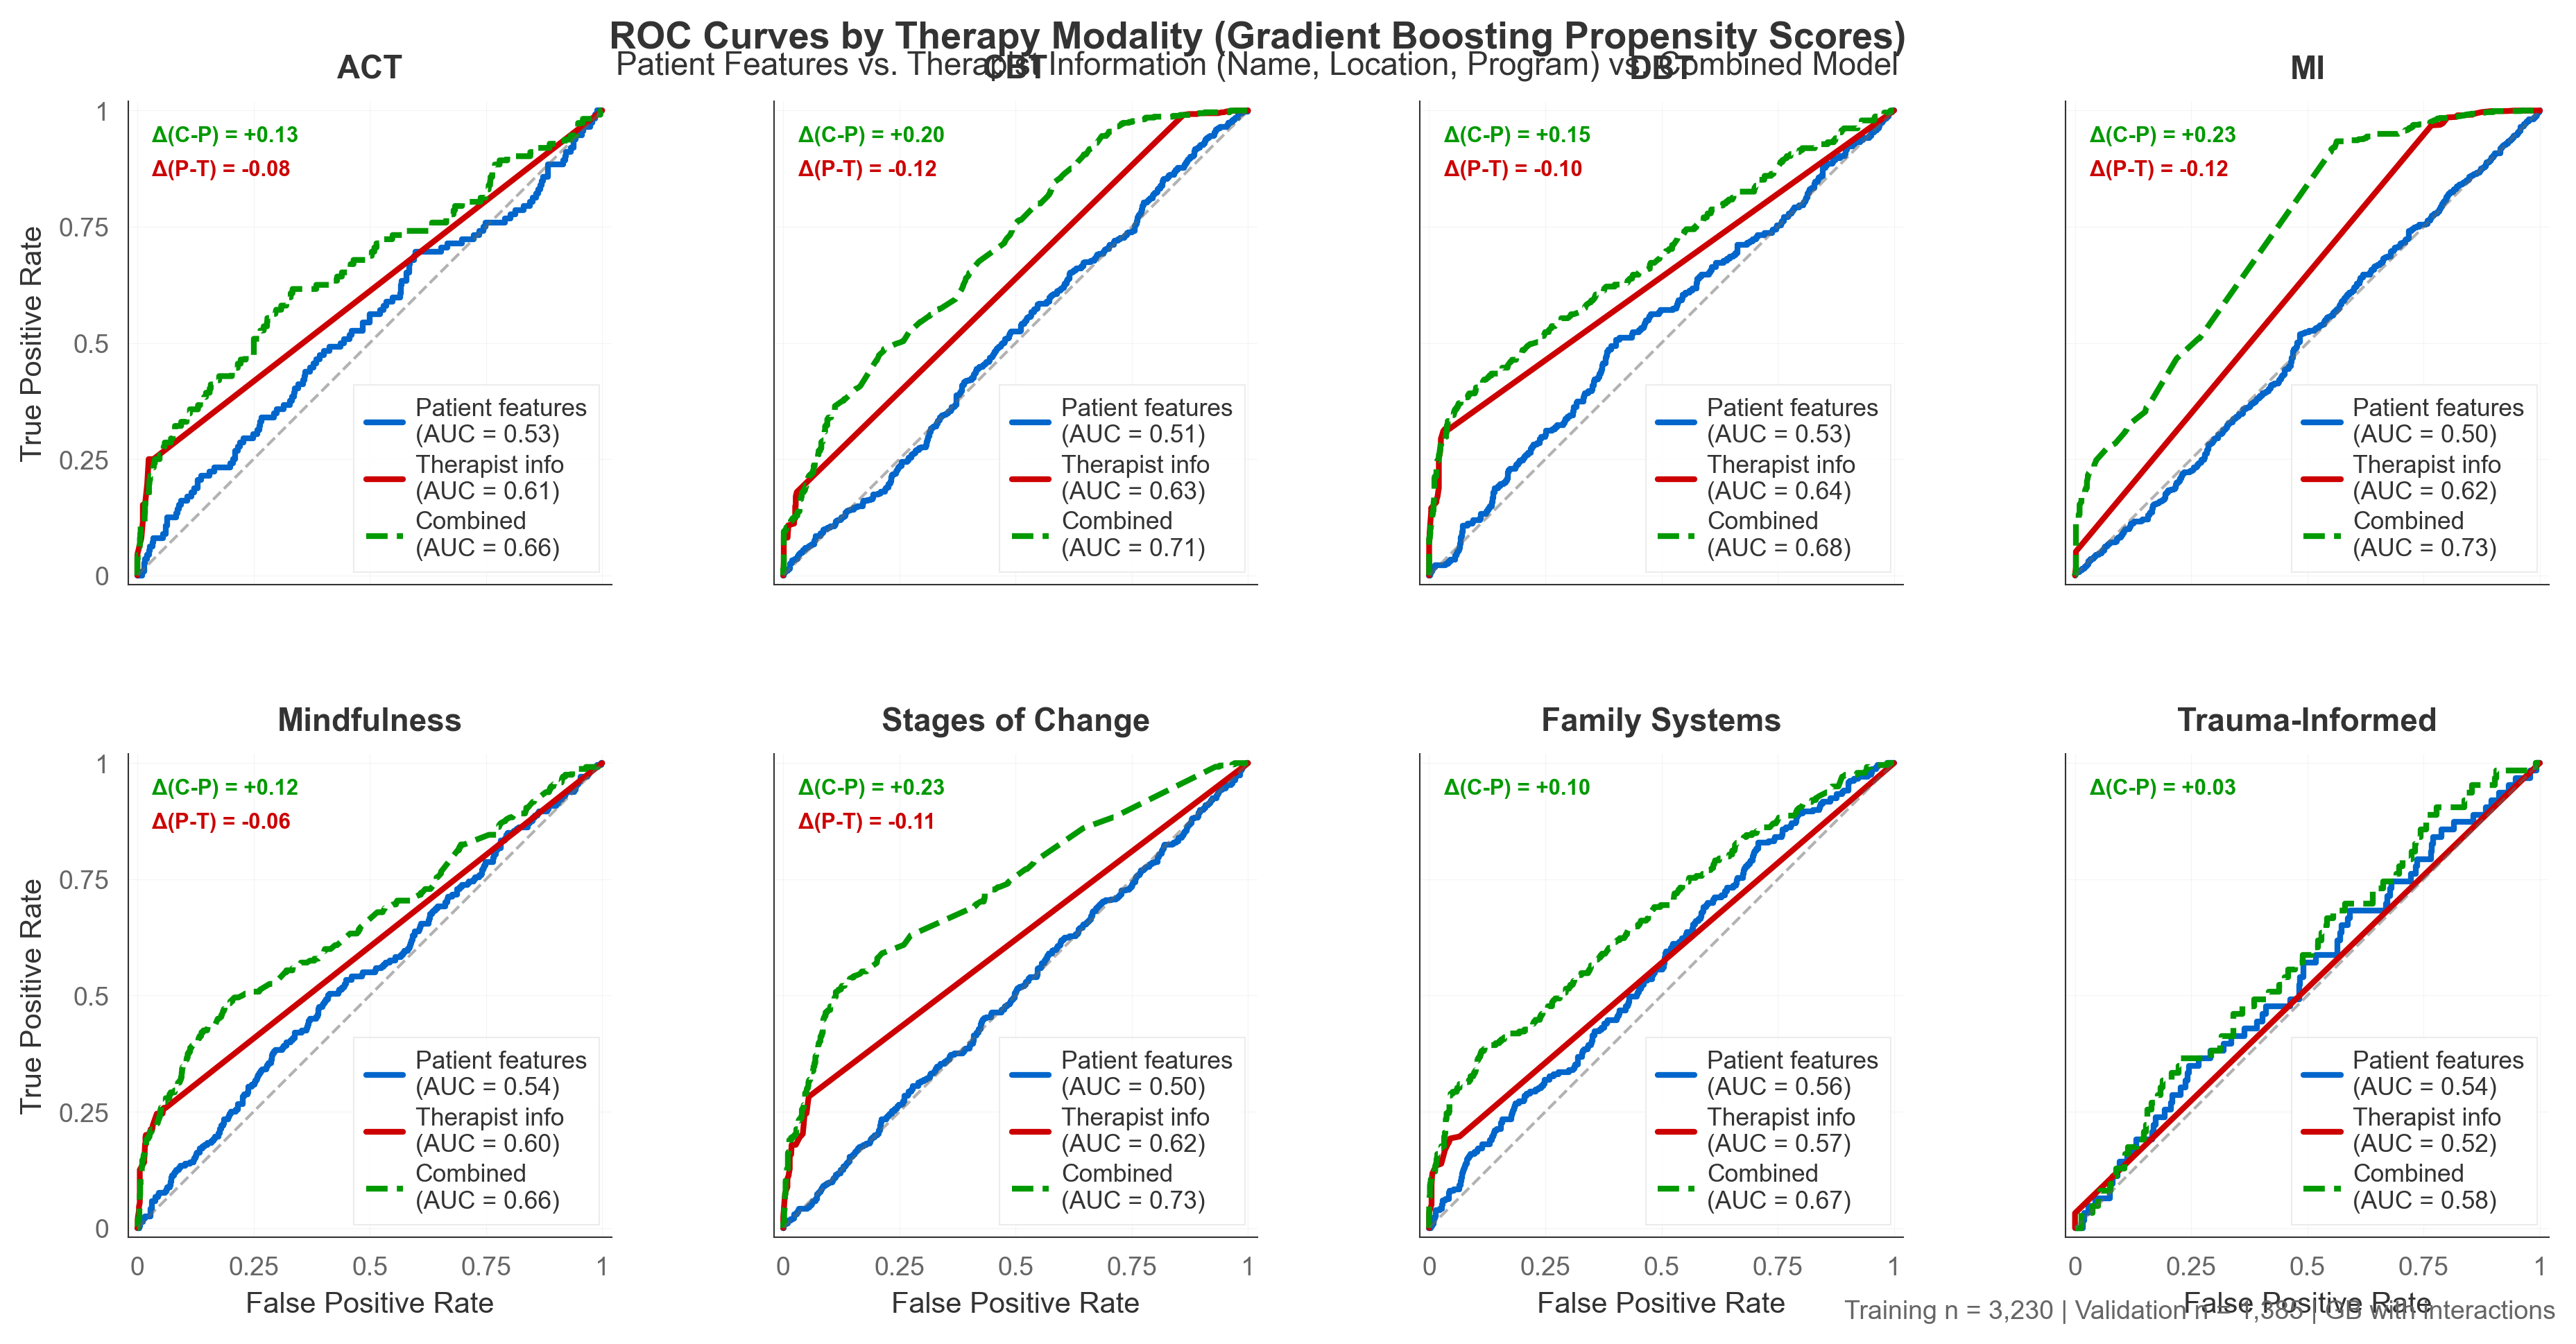

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up JAMA publication style
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333'
})

# JAMA-approved color palette
JAMA_COLORS = {
    'primary': '#0066CC',      # Deep blue for patient features
    'secondary': '#CC0000',    # Deep red for therapist
    'combined': '#009900',     # Deep green for combined model
    'grid': '#EBEBEB',         # Light gray for grid
    'reference': '#666666',    # Gray for diagonal reference line
    'text': '#333333'          # Dark gray for text
}

# === FIX THE DATA LEAKAGE ===
# Define patient features WITHOUT therapy columns
patient_features_for_therapy_prediction = []

# Add baseline risk if available
if "risk_high_initial" in model_df.columns:
    patient_features_for_therapy_prediction.append("risk_high_initial")

# Add diagnosis features
dx_features = [c for c in model_df.columns if c.startswith("dx_") and c not in therapy_labels]
patient_features_for_therapy_prediction.extend(dx_features)

# Add primary diagnosis features
prim_dx_features = [c for c in model_df.columns if c.startswith("prim_dx_")]
patient_features_for_therapy_prediction.extend(prim_dx_features)

# Add symptom features
symp_features = [c for c in model_df.columns if c.startswith("symp_")]
patient_features_for_therapy_prediction.extend(symp_features)

# Add family features
fam_features = [c for c in model_df.columns if c.startswith("fam_")]
patient_features_for_therapy_prediction.extend(fam_features)

# Add precipitating features
precip_features = [c for c in model_df.columns if c.startswith("precip_")]
patient_features_for_therapy_prediction.extend(precip_features)

# Add protective features
prot_features = [c for c in model_df.columns if c.startswith("prot_")]
patient_features_for_therapy_prediction.extend(prot_features)

# Remove duplicates and ensure all features exist in the dataframe
patient_features_for_therapy_prediction = list(set([f for f in patient_features_for_therapy_prediction 
                                                     if f in model_df.columns]))

print(f"Using {len(patient_features_for_therapy_prediction)} patient features for therapy prediction")
print(f"Sample features: {patient_features_for_therapy_prediction[:5]}")

# --- Temporal split: first 70% train, last 30% validate ---
model_df = model_df.sort_values("admit_date").reset_index(drop=True)
split_idx = int(len(model_df) * 0.7)
train_df = model_df.iloc[:split_idx]
valid_df = model_df.iloc[split_idx:]
print(f"Training size: {train_df.shape[0]}")
print(f"Validation size: {valid_df.shape[0]}")

# --- Function for one therapy using Gradient Boosting ---
def get_gb_curves_for_therapy(train_df, valid_df, therapy_col, label,
                               patient_features, therapist_cols=["therapist_name", "location", "program"]):
    """
    Predict therapy assignment using Gradient Boosting for propensity scores:
    1. Patient features only
    2. Therapist information only (name, location, program)
    3. Combined (patient features + therapist information)
    
    Gradient Boosting naturally captures non-linear relationships and interactions.
    """
    # Get the therapy labels (target variable)
    y_train = train_df[therapy_col].fillna(0).astype(int)
    y_test = valid_df[therapy_col].fillna(0).astype(int)
    
    # Filter therapist columns to only those that exist
    available_therapist_cols = [col for col in therapist_cols if col in train_df.columns]
    
    print(f"  {label}: ", end="")
    
    # === PATIENT FEATURES MODEL ===
    # Create preprocessing pipeline for patient features
    patient_preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Preprocess patient features
    X_train_patient = patient_preprocessor.fit_transform(train_df[patient_features])
    X_test_patient = patient_preprocessor.transform(valid_df[patient_features])
    
    # Train gradient boosting model
    patient_gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=42,
        max_features='sqrt'  # Use subset of features to reduce overfitting
    )
    patient_gb.fit(X_train_patient, y_train)
    y_pred_patient = patient_gb.predict_proba(X_test_patient)[:, 1]
    
    # === THERAPIST FEATURES MODEL ===
    # Create preprocessing for therapist features (categorical)
    therapist_preprocessor = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    # Handle missing values in therapist columns
    train_therapist_filled = train_df[available_therapist_cols].fillna('Unknown')
    valid_therapist_filled = valid_df[available_therapist_cols].fillna('Unknown')
    
    # Preprocess therapist features
    X_train_therapist = therapist_preprocessor.fit_transform(train_therapist_filled)
    X_test_therapist = therapist_preprocessor.transform(valid_therapist_filled)
    
    # Train gradient boosting model for therapist features
    therapist_gb = GradientBoostingClassifier(
        n_estimators=50,  # Fewer trees for simpler categorical features
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=42
    )
    therapist_gb.fit(X_train_therapist, y_train)
    y_pred_therapist = therapist_gb.predict_proba(X_test_therapist)[:, 1]
    
    # === COMBINED MODEL ===
    # Combine preprocessed features
    X_train_combined = np.hstack([X_train_patient, X_train_therapist])
    X_test_combined = np.hstack([X_test_patient, X_test_therapist])
    
    # Train combined gradient boosting model
    combined_gb = GradientBoostingClassifier(
        n_estimators=150,  # More trees for combined features
        learning_rate=0.1,
        max_depth=4,  # Slightly deeper trees for interactions
        subsample=0.8,
        random_state=42,
        max_features='sqrt'
    )
    combined_gb.fit(X_train_combined, y_train)
    y_pred_combined = combined_gb.predict_proba(X_test_combined)[:, 1]
    
    # Calculate ROC curves
    fpr_p, tpr_p, _ = roc_curve(y_test, y_pred_patient)
    fpr_t, tpr_t, _ = roc_curve(y_test, y_pred_therapist)
    fpr_c, tpr_c, _ = roc_curve(y_test, y_pred_combined)
    auc_p = auc(fpr_p, tpr_p)
    auc_t = auc(fpr_t, tpr_t)
    auc_c = auc(fpr_c, tpr_c)
    
    print(f"Patient={auc_p:.3f}, Therapist={auc_t:.3f}, Combined={auc_c:.3f}")
    
    return {
        "therapy": label,
        "patient": (fpr_p, tpr_p, auc_p),
        "therapist": (fpr_t, tpr_t, auc_t),
        "combined": (fpr_c, tpr_c, auc_c),
    }

# --- Collect results ---
print("\nFitting Gradient Boosting models for each therapy modality...")
print("=" * 60)

results = []

# Define therapy columns and their display labels
therapy_labels = {
    "ACT": "ACT",
    "CBT": "CBT",
    "DBT": "DBT",
    "Motivational Interviewing": "MI",
    "Mindfulness": "Mindfulness",
    "Stages of Change": "Stages of Change",
    "Family Systems": "Family Systems",
    "Trauma-Informed": "Trauma-Informed",
}

# Process each therapy
for col, label in therapy_labels.items():
    if col in model_df.columns:
        res = get_gb_curves_for_therapy(
            train_df, valid_df, col, label,
            patient_features_for_therapy_prediction,
            therapist_cols=["therapist_name", "location", "program"]
        )
        results.append(res)
    else:
        print(f"  Warning: Therapy column '{col}' not found in dataframe")

print("=" * 60)
print("Gradient Boosting model fitting complete!")

# --- Create publication-quality ROC figure ---
ncols = 4
nrows = 2  # 8 therapies = 2 rows x 4 columns
panel_size = 3  # Size for each square panel

# Create figure with square panels
fig = plt.figure(figsize=(ncols * panel_size + 1, nrows * panel_size + 0.5), 
                 dpi=300, facecolor='white')

# Create grid with proper spacing
gs = fig.add_gridspec(nrows, ncols, 
                      hspace=0.35, wspace=0.3,
                      left=0.08, right=0.98,
                      top=0.92, bottom=0.08)

# Plot each therapy
for idx, res in enumerate(results):
    row = idx // ncols
    col = idx % ncols
    ax = fig.add_subplot(gs[row, col])
    
    # Make the panel square
    ax.set_aspect('equal', adjustable='box')
    
    # Plot ROC curves with JAMA colors and styling
    fpr_p, tpr_p, auc_p = res["patient"]
    fpr_t, tpr_t, auc_t = res["therapist"]
    fpr_c, tpr_c, auc_c = res["combined"]
    
    # Patient features line (primary - blue)
    ax.plot(fpr_p, tpr_p, 
            color=JAMA_COLORS['primary'], 
            linewidth=2, 
            label=f'Patient features\n(AUC = {auc_p:.2f})',
            solid_capstyle='round')
    
    # Therapist line (secondary - red)
    ax.plot(fpr_t, tpr_t, 
            color=JAMA_COLORS['secondary'], 
            linewidth=2,
            label=f'Therapist info\n(AUC = {auc_t:.2f})',
            solid_capstyle='round')
    
    # Combined line (green)
    ax.plot(fpr_c, tpr_c, 
            color=JAMA_COLORS['combined'], 
            linewidth=2,
            label=f'Combined\n(AUC = {auc_c:.2f})',
            solid_capstyle='round',
            linestyle='--')  # Dashed to distinguish
    
    # Reference diagonal line
    ax.plot([0, 1], [0, 1], 
            color=JAMA_COLORS['reference'], 
            linestyle='--', 
            linewidth=1, 
            alpha=0.5)
    
    # Styling
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    
    # Add subtle grid
    ax.grid(True, linestyle='-', linewidth=0.25, 
            color=JAMA_COLORS['grid'], alpha=0.5)
    ax.set_axisbelow(True)
    
    # Panel title
    ax.set_title(res["therapy"], 
                 fontsize=11, 
                 fontweight='bold', 
                 color=JAMA_COLORS['text'],
                 pad=8)
    
    # Axis labels (only for edge panels for cleaner look)
    if row == nrows - 1:  # Bottom row
        ax.set_xlabel('False Positive Rate', fontsize=10)
    else:
        ax.set_xlabel('')
        
    if col == 0:  # Left column
        ax.set_ylabel('True Positive Rate', fontsize=10)
    else:
        ax.set_ylabel('')
    
    # Set ticks
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    
    # Format tick labels
    if row == nrows - 1:
        ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=9)
    else:
        ax.set_xticklabels([])
        
    if col == 0:
        ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=9)
    else:
        ax.set_yticklabels([])
    
    # Remove spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    
    # Add legend with custom styling
    legend = ax.legend(loc='lower right', 
                      fontsize=8.5,
                      frameon=True,
                      fancybox=False,
                      borderpad=0.5,
                      handlelength=1.5,
                      handletextpad=0.5,
                      labelspacing=0.3)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.95)
    legend.get_frame().set_edgecolor(JAMA_COLORS['grid'])
    legend.get_frame().set_linewidth(0.5)
    
    # Add AUC difference annotations
    auc_diff_pc = auc_c - auc_p  # Combined vs Patient
    auc_diff_pt = auc_p - auc_t  # Patient vs Therapist
    
    # Show improvement from adding therapist info to patient features
    if abs(auc_diff_pc) > 0.03:  # Only show if difference is meaningful
        ax.text(0.05, 0.95, f'Δ(C-P) = {auc_diff_pc:+.2f}',
               transform=ax.transAxes,
               fontsize=7.5,
               color=JAMA_COLORS['combined'],
               fontweight='bold',
               va='top')
    
    # Show difference between patient and therapist
    if abs(auc_diff_pt) > 0.03:
        diff_color = JAMA_COLORS['primary'] if auc_diff_pt > 0 else JAMA_COLORS['secondary']
        ax.text(0.05, 0.88, f'Δ(P-T) = {auc_diff_pt:+.2f}',
               transform=ax.transAxes,
               fontsize=7.5,
               color=diff_color,
               fontweight='bold',
               va='top')

# Main title
fig.suptitle('ROC Curves by Therapy Modality (Gradient Boosting Propensity Scores)',
             fontsize=13, 
             fontweight='bold', 
             color=JAMA_COLORS['text'],
             y=0.98)

# Subtitle
fig.text(0.5, 0.94, 
         'Patient Features vs. Therapist Information (Name, Location, Program) vs. Combined Model',
         ha='center',
         fontsize=11,
         color=JAMA_COLORS['text'])

# Add sample size and method annotation
fig.text(0.98, 0.02, 
         f'Training n = {train_df.shape[0]:,} | Validation n = {valid_df.shape[0]:,} | GB with interactions',
         ha='right',
         fontsize=9,
         color=JAMA_COLORS['reference'])

# Display the figure
plt.show()

# Save options
# plt.savefig('roc_curves_gb_therapy.pdf', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('roc_curves_gb_therapy.png', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('roc_curves_gb_therapy.tiff', dpi=600, bbox_inches='tight', facecolor='white')

Using 97 patient features for HAL therapy prediction
Training size: 3230
Validation size: 1385

Fitting Fast HAL models for each therapy...
ACT: Patient AUC = 0.564, Therapist AUC = 0.591, Combined AUC = 0.592
CBT: Patient AUC = 0.513, Therapist AUC = 0.579, Combined AUC = 0.641
DBT: Patient AUC = 0.500, Therapist AUC = 0.643, Combined AUC = 0.666
MI: Patient AUC = 0.500, Therapist AUC = 0.602, Combined AUC = 0.618
Mindfulness: Patient AUC = 0.520, Therapist AUC = 0.605, Combined AUC = 0.626
Stages of Change: Patient AUC = 0.500, Therapist AUC = 0.624, Combined AUC = 0.642
Family Systems: Patient AUC = 0.500, Therapist AUC = 0.581, Combined AUC = 0.629
Trauma-Informed: Patient AUC = 0.500, Therapist AUC = 0.500, Combined AUC = 0.604


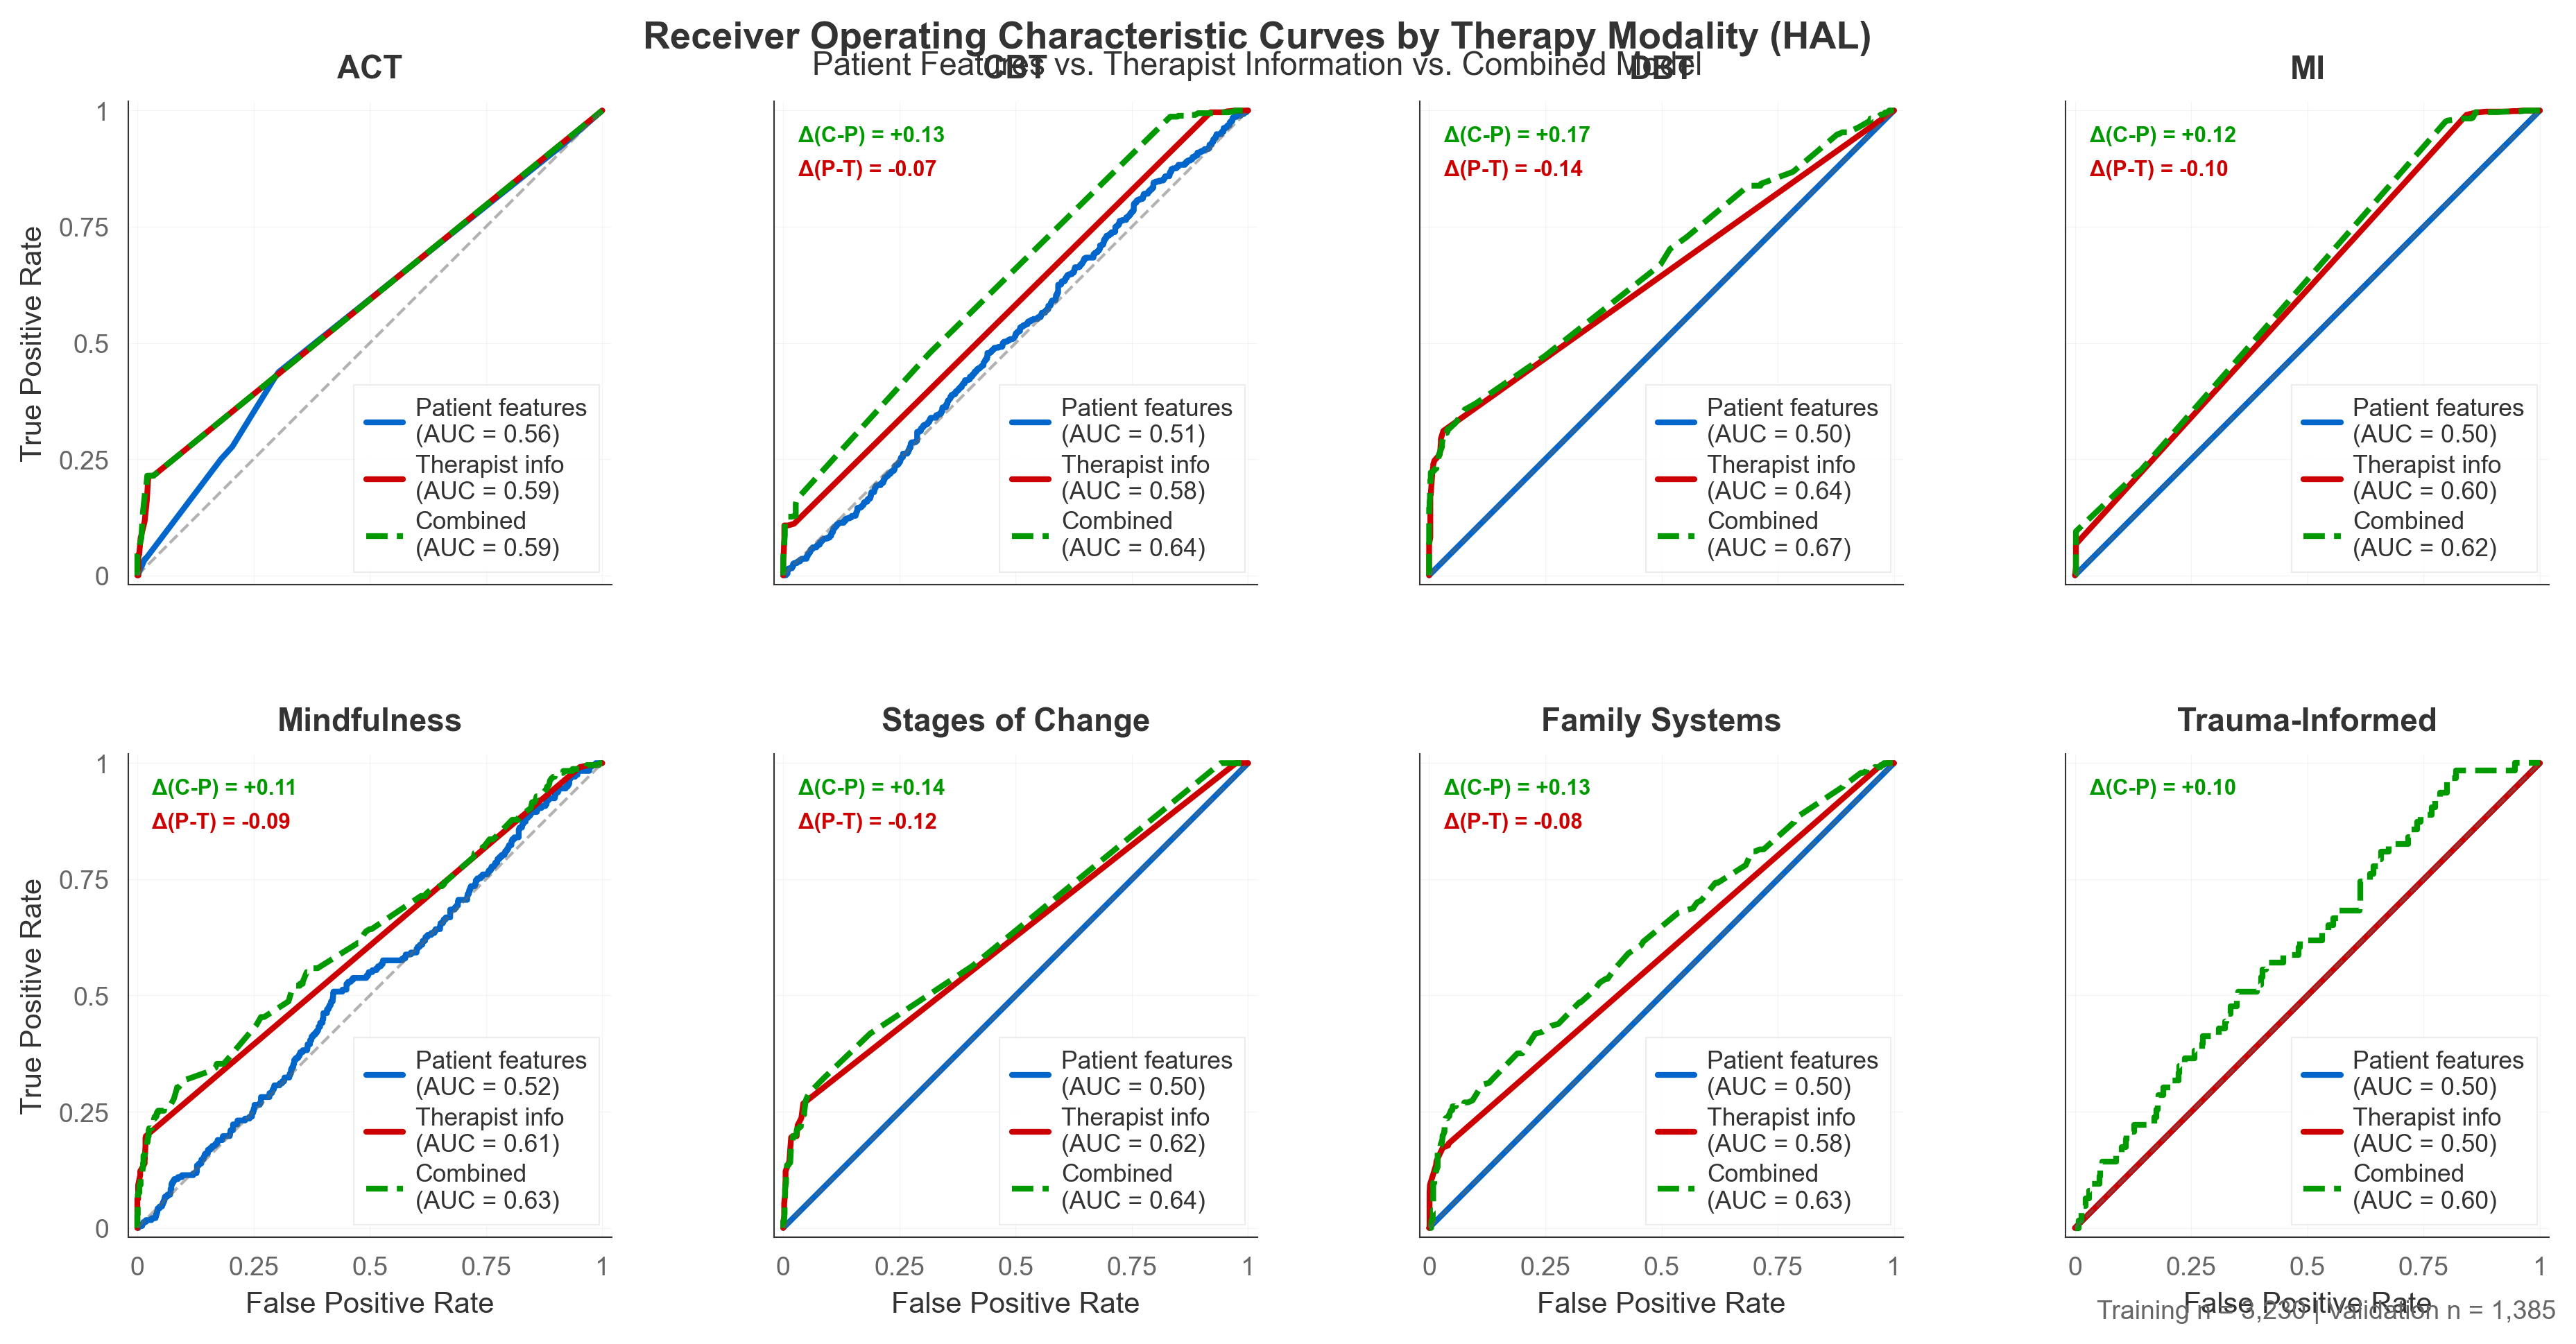

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# ========== FAST HAL IMPLEMENTATION ==========

class FastHALClassifier:
    """
    Fast approximation of HAL that's computationally feasible for high-dimensional data.
    Uses feature selection and limited basis expansion to maintain tractability.
    """
    
    def __init__(self, max_features=50, n_knots=3, interaction_pairs=20, cv_folds=5, random_state=42):
        self.max_features = max_features
        self.n_knots = n_knots
        self.interaction_pairs = interaction_pairs
        self.cv_folds = cv_folds
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit the fast HAL model with feature selection."""
        X = np.array(X)
        y = np.array(y)
        
        # Step 1: Feature selection to reduce dimensionality
        if X.shape[1] > self.max_features:
            self.selector_ = SelectKBest(f_classif, k=min(self.max_features, X.shape[1]))
            X_selected = self.selector_.fit_transform(X, y)
            self.selected_features_ = self.selector_.get_support()
        else:
            X_selected = X
            self.selected_features_ = np.ones(X.shape[1], dtype=bool)
            self.selector_ = None
        
        # Step 2: Standardize selected features
        self.scaler_ = StandardScaler()
        X_scaled = self.scaler_.fit_transform(X_selected)
        
        # Step 3: Create simple basis expansion
        basis_features = []
        
        # Store quantiles for transformation
        self.quantiles_ = {}
        n_top_features = min(20, X_scaled.shape[1])
        
        for i in range(n_top_features):
            feature = X_scaled[:, i]
            quantiles = np.percentile(feature, [33, 67])
            self.quantiles_[i] = quantiles
            
            # Create indicator features for bins
            low = (feature <= quantiles[0]).astype(float)
            mid = ((feature > quantiles[0]) & (feature <= quantiles[1])).astype(float)
            high = (feature > quantiles[1]).astype(float)
            
            basis_features.extend([low, mid, high])
        
        # Step 4: Add limited interaction terms
        if self.interaction_pairs > 0 and X_scaled.shape[1] > 1:
            n_interact = min(10, X_scaled.shape[1])
            for i in range(min(self.interaction_pairs, n_interact)):
                for j in range(i+1, min(i+3, n_interact)):
                    interaction = X_scaled[:, i] * X_scaled[:, j]
                    basis_features.append(interaction)
        
        # Step 5: Combine features
        if basis_features:
            X_expanded = np.column_stack([X_scaled] + basis_features)
        else:
            X_expanded = X_scaled
        
        self.n_basis_features_ = X_expanded.shape[1]
        
        # Step 6: Fit regularized logistic regression
        self.model_ = LogisticRegressionCV(
            penalty='l1',
            solver='saga',
            cv=self.cv_folds,
            max_iter=500,
            random_state=self.random_state,
            class_weight='balanced',
            n_jobs=-1
        )
        
        self.model_.fit(X_expanded, y)
        self.n_selected_ = np.sum(np.abs(self.model_.coef_[0]) > 1e-10)
        
        return self
    
    def transform_features(self, X):
        """Transform features using the same pipeline as training."""
        X = np.array(X)
        
        # Apply feature selection
        if self.selector_ is not None:
            X_selected = self.selector_.transform(X)
        else:
            X_selected = X
        
        # Scale
        X_scaled = self.scaler_.transform(X_selected)
        
        # Create basis expansion
        basis_features = []
        n_top_features = min(20, X_scaled.shape[1])
        
        for i in range(n_top_features):
            feature = X_scaled[:, i]
            quantiles = self.quantiles_[i]
            
            low = (feature <= quantiles[0]).astype(float)
            mid = ((feature > quantiles[0]) & (feature <= quantiles[1])).astype(float)
            high = (feature > quantiles[1]).astype(float)
            
            basis_features.extend([low, mid, high])
        
        # Add interactions
        if self.interaction_pairs > 0 and X_scaled.shape[1] > 1:
            n_interact = min(10, X_scaled.shape[1])
            for i in range(min(self.interaction_pairs, n_interact)):
                for j in range(i+1, min(i+3, n_interact)):
                    interaction = X_scaled[:, i] * X_scaled[:, j]
                    basis_features.append(interaction)
        
        if basis_features:
            X_expanded = np.column_stack([X_scaled] + basis_features)
        else:
            X_expanded = X_scaled
        
        return X_expanded
    
    def predict_proba(self, X):
        """Predict probabilities."""
        X_transformed = self.transform_features(X)
        return self.model_.predict_proba(X_transformed)

# ========== MAIN ANALYSIS FUNCTION ==========

def get_hal_curves_for_therapy(train_df, valid_df, therapy_col, label,
                               patient_features, therapist_cols=["therapist_name", "location", "program"]):
    """
    Predict therapy assignment using Fast HAL for:
    1. Patient features only
    2. Therapist information only 
    3. Combined (patient features + therapist information)
    """
    
    # Get therapy labels
    y_train = train_df[therapy_col].fillna(0).astype(int)
    y_test = valid_df[therapy_col].fillna(0).astype(int)
    
    # Filter therapist columns to those that exist
    available_therapist_cols = [col for col in therapist_cols if col in train_df.columns]
    
    # === PREPARE FEATURES ===
    
    # Patient features
    imputer = SimpleImputer(strategy='median')
    X_train_patient = imputer.fit_transform(train_df[patient_features])
    X_test_patient = imputer.transform(valid_df[patient_features])
    
    # Therapist features (one-hot encoded)
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    train_therapist_filled = train_df[available_therapist_cols].fillna('Unknown')
    valid_therapist_filled = valid_df[available_therapist_cols].fillna('Unknown')
    
    X_train_therapist = encoder.fit_transform(train_therapist_filled)
    X_test_therapist = encoder.transform(valid_therapist_filled)
    
    # Combined features
    X_train_combined = np.hstack([X_train_patient, X_train_therapist])
    X_test_combined = np.hstack([X_test_patient, X_test_therapist])
    
    # === FIT HAL MODELS ===
    
    # 1. Patient features only
    hal_patient = FastHALClassifier(
        max_features=50,
        n_knots=3,
        interaction_pairs=10,
        random_state=42
    )
    hal_patient.fit(X_train_patient, y_train.values)
    y_pred_patient = hal_patient.predict_proba(X_test_patient)[:, 1]
    
    # 2. Therapist features only
    hal_therapist = FastHALClassifier(
        max_features=30,
        n_knots=2,
        interaction_pairs=0,  # No interactions for categorical
        random_state=42
    )
    hal_therapist.fit(X_train_therapist, y_train.values)
    y_pred_therapist = hal_therapist.predict_proba(X_test_therapist)[:, 1]
    
    # 3. Combined model
    hal_combined = FastHALClassifier(
        max_features=60,
        n_knots=3,
        interaction_pairs=15,
        random_state=42
    )
    hal_combined.fit(X_train_combined, y_train.values)
    y_pred_combined = hal_combined.predict_proba(X_test_combined)[:, 1]
    
    # === CALCULATE ROC CURVES ===
    
    fpr_p, tpr_p, _ = roc_curve(y_test, y_pred_patient)
    fpr_t, tpr_t, _ = roc_curve(y_test, y_pred_therapist)
    fpr_c, tpr_c, _ = roc_curve(y_test, y_pred_combined)
    
    auc_p = auc(fpr_p, tpr_p)
    auc_t = auc(fpr_t, tpr_t)
    auc_c = auc(fpr_c, tpr_c)
    
    print(f"{label}: Patient AUC = {auc_p:.3f}, Therapist AUC = {auc_t:.3f}, Combined AUC = {auc_c:.3f}")
    
    return {
        "therapy": label,
        "patient": (fpr_p, tpr_p, auc_p),
        "therapist": (fpr_t, tpr_t, auc_t),
        "combined": (fpr_c, tpr_c, auc_c),
    }

# ========== SET UP JAMA STYLING ==========

plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333'
})

JAMA_COLORS = {
    'primary': '#0066CC',      # Deep blue for patient features
    'secondary': '#CC0000',    # Deep red for therapist
    'combined': '#009900',     # Deep green for combined model
    'grid': '#EBEBEB',         # Light gray for grid
    'reference': '#666666',    # Gray for diagonal reference line
    'text': '#333333'          # Dark gray for text
}

# ========== DEFINE FEATURES ==========

patient_features_for_therapy_prediction = []

# Add all feature types
if "risk_high_initial" in model_df.columns:
    patient_features_for_therapy_prediction.append("risk_high_initial")

# Add diagnosis, symptom, family, etc. features
for prefix in ['dx_', 'prim_dx_', 'symp_', 'fam_', 'precip_', 'prot_']:
    features = [c for c in model_df.columns if c.startswith(prefix)]
    patient_features_for_therapy_prediction.extend(features)

# Add ICD codes (limited)
icd_features = [c for c in model_df.columns if '.' in c][:50]
patient_features_for_therapy_prediction.extend(icd_features)

# Remove duplicates
patient_features_for_therapy_prediction = list(set([f for f in patient_features_for_therapy_prediction 
                                                     if f in model_df.columns]))

print(f"Using {len(patient_features_for_therapy_prediction)} patient features for HAL therapy prediction")

# ========== TEMPORAL SPLIT ==========

model_df = model_df.sort_values("admit_date").reset_index(drop=True)
split_idx = int(len(model_df) * 0.7)
train_df = model_df.iloc[:split_idx]
valid_df = model_df.iloc[split_idx:]

print(f"Training size: {train_df.shape[0]}")
print(f"Validation size: {valid_df.shape[0]}")

# ========== PROCESS EACH THERAPY ==========

therapy_labels = {
    "ACT": "ACT",
    "CBT": "CBT",
    "DBT": "DBT",
    "Motivational Interviewing": "MI",
    "Mindfulness": "Mindfulness",
    "Stages of Change": "Stages of Change",
    "Family Systems": "Family Systems",
    "Trauma-Informed": "Trauma-Informed",
}

print("\nFitting Fast HAL models for each therapy...")
print("=" * 60)

results = []
for col, label in therapy_labels.items():
    if col in model_df.columns:
        res = get_hal_curves_for_therapy(
            train_df, valid_df, col, label,
            patient_features_for_therapy_prediction,
            therapist_cols=["therapist_name", "location", "program"]
        )
        results.append(res)

print("=" * 60)

# ========== CREATE VISUALIZATION ==========

ncols = 4
nrows = 2
panel_size = 3

fig = plt.figure(figsize=(ncols * panel_size + 1, nrows * panel_size + 0.5), 
                 dpi=300, facecolor='white')

gs = fig.add_gridspec(nrows, ncols, 
                      hspace=0.35, wspace=0.3,
                      left=0.08, right=0.98,
                      top=0.92, bottom=0.08)

# Plot each therapy
for idx, res in enumerate(results):
    row = idx // ncols
    col = idx % ncols
    ax = fig.add_subplot(gs[row, col])
    
    # Make panel square
    ax.set_aspect('equal', adjustable='box')
    
    # Plot ROC curves
    fpr_p, tpr_p, auc_p = res["patient"]
    fpr_t, tpr_t, auc_t = res["therapist"]
    fpr_c, tpr_c, auc_c = res["combined"]
    
    # Patient features line (blue)
    ax.plot(fpr_p, tpr_p, 
            color=JAMA_COLORS['primary'], 
            linewidth=2, 
            label=f'Patient features\n(AUC = {auc_p:.2f})',
            solid_capstyle='round')
    
    # Therapist line (red)
    ax.plot(fpr_t, tpr_t, 
            color=JAMA_COLORS['secondary'], 
            linewidth=2,
            label=f'Therapist info\n(AUC = {auc_t:.2f})',
            solid_capstyle='round')
    
    # Combined line (green, dashed)
    ax.plot(fpr_c, tpr_c, 
            color=JAMA_COLORS['combined'], 
            linewidth=2,
            label=f'Combined\n(AUC = {auc_c:.2f})',
            solid_capstyle='round',
            linestyle='--')
    
    # Reference diagonal
    ax.plot([0, 1], [0, 1], 
            color=JAMA_COLORS['reference'], 
            linestyle='--', 
            linewidth=1, 
            alpha=0.5)
    
    # Styling
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    ax.grid(True, linestyle='-', linewidth=0.25, 
            color=JAMA_COLORS['grid'], alpha=0.5)
    ax.set_axisbelow(True)
    
    # Title
    ax.set_title(res["therapy"], 
                 fontsize=11, 
                 fontweight='bold', 
                 color=JAMA_COLORS['text'],
                 pad=8)
    
    # Axis labels (only edge panels)
    if row == nrows - 1:
        ax.set_xlabel('False Positive Rate', fontsize=10)
    if col == 0:
        ax.set_ylabel('True Positive Rate', fontsize=10)
    
    # Ticks
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    
    if row == nrows - 1:
        ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=9)
    else:
        ax.set_xticklabels([])
    
    if col == 0:
        ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=9)
    else:
        ax.set_yticklabels([])
    
    # Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    
    # Legend
    legend = ax.legend(loc='lower right', 
                      fontsize=8.5,
                      frameon=True,
                      fancybox=False,
                      borderpad=0.5,
                      handlelength=1.5,
                      handletextpad=0.5,
                      labelspacing=0.3)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.95)
    legend.get_frame().set_edgecolor(JAMA_COLORS['grid'])
    legend.get_frame().set_linewidth(0.5)
    
    # AUC difference annotations
    auc_diff_pc = auc_c - auc_p
    auc_diff_pt = auc_p - auc_t
    
    if abs(auc_diff_pc) > 0.03:
        ax.text(0.05, 0.95, f'Δ(C-P) = {auc_diff_pc:+.2f}',
               transform=ax.transAxes,
               fontsize=7.5,
               color=JAMA_COLORS['combined'],
               fontweight='bold',
               va='top')
    
    if abs(auc_diff_pt) > 0.03:
        diff_color = JAMA_COLORS['primary'] if auc_diff_pt > 0 else JAMA_COLORS['secondary']
        ax.text(0.05, 0.88, f'Δ(P-T) = {auc_diff_pt:+.2f}',
               transform=ax.transAxes,
               fontsize=7.5,
               color=diff_color,
               fontweight='bold',
               va='top')

# Titles
fig.suptitle('Receiver Operating Characteristic Curves by Therapy Modality (HAL)',
             fontsize=13, 
             fontweight='bold', 
             color=JAMA_COLORS['text'],
             y=0.98)

fig.text(0.5, 0.94, 
         'Patient Features vs. Therapist Information vs. Combined Model',
         ha='center',
         fontsize=11,
         color=JAMA_COLORS['text'])

# Sample size annotation
fig.text(0.98, 0.02, 
         f'Training n = {train_df.shape[0]:,} | Validation n = {valid_df.shape[0]:,}',
         ha='right',
         fontsize=9,
         color=JAMA_COLORS['reference'])

plt.show()

# Save figure
# plt.savefig('hal_roc_curves_therapy.pdf', dpi=300, bbox_inches='tight', facecolor='white')

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

class FastHALClassifier:
    """
    Fast approximation of HAL that's computationally feasible for high-dimensional data.
    Uses feature selection and limited basis expansion to maintain tractability.
    """
    
    def __init__(self, max_features=50, n_knots=3, interaction_pairs=20, cv_folds=5, random_state=42):
        """
        Parameters:
        -----------
        max_features : int
            Maximum number of features to use (after feature selection)
        n_knots : int
            Number of knots for basis expansion (keep small for speed)
        interaction_pairs : int
            Maximum number of interaction terms to create
        """
        self.max_features = max_features
        self.n_knots = n_knots
        self.interaction_pairs = interaction_pairs
        self.cv_folds = cv_folds
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit the fast HAL model with feature selection."""
        X = np.array(X)
        y = np.array(y)
        
        # Step 1: Feature selection to reduce dimensionality
        # Use univariate feature selection to identify most relevant features
        if X.shape[1] > self.max_features:
            self.selector_ = SelectKBest(f_classif, k=min(self.max_features, X.shape[1]))
            X_selected = self.selector_.fit_transform(X, y)
            self.selected_features_ = self.selector_.get_support()
        else:
            X_selected = X
            self.selected_features_ = np.ones(X.shape[1], dtype=bool)
            self.selector_ = None
        
        # Step 2: Standardize selected features
        self.scaler_ = StandardScaler()
        X_scaled = self.scaler_.fit_transform(X_selected)
        
        # Step 3: Create simple basis expansion (just quantile bins for speed)
        basis_features = []
        
        # Create binned versions of top features
        n_top_features = min(20, X_scaled.shape[1])  # Only expand top 20 features
        for i in range(n_top_features):
            feature = X_scaled[:, i]
            # Create quantile-based bins
            quantiles = np.percentile(feature, [33, 67])
            
            # Create indicator features for bins
            low = (feature <= quantiles[0]).astype(float)
            mid = ((feature > quantiles[0]) & (feature <= quantiles[1])).astype(float)
            high = (feature > quantiles[1]).astype(float)
            
            basis_features.extend([low, mid, high])
        
        # Step 4: Add limited interaction terms between top features
        if self.interaction_pairs > 0 and X_scaled.shape[1] > 1:
            # Only create interactions between most important features
            n_interact = min(10, X_scaled.shape[1])
            for i in range(min(self.interaction_pairs, n_interact)):
                for j in range(i+1, min(i+3, n_interact)):  # Limited interactions
                    interaction = X_scaled[:, i] * X_scaled[:, j]
                    basis_features.append(interaction)
        
        # Step 5: Combine original features with basis expansion
        if basis_features:
            X_expanded = np.column_stack([X_scaled] + basis_features)
        else:
            X_expanded = X_scaled
        
        self.n_basis_features_ = X_expanded.shape[1]
        
        # Step 6: Fit regularized logistic regression
        self.model_ = LogisticRegressionCV(
            penalty='l1',
            solver='saga',
            cv=self.cv_folds,
            max_iter=500,  # Reduced iterations for speed
            random_state=self.random_state,
            class_weight='balanced',
            n_jobs=-1  # Parallel processing
        )
        
        self.model_.fit(X_expanded, y)
        
        # Count selected features
        self.n_selected_ = np.sum(np.abs(self.model_.coef_[0]) > 1e-10)
        
        return self
    
    def transform_features(self, X):
        """Transform features using the same pipeline as training."""
        X = np.array(X)
        
        # Apply feature selection
        if self.selector_ is not None:
            X_selected = self.selector_.transform(X)
        else:
            X_selected = X
        
        # Scale
        X_scaled = self.scaler_.transform(X_selected)
        
        # Create basis expansion (same as in fit)
        basis_features = []
        
        n_top_features = min(20, X_scaled.shape[1])
        for i in range(n_top_features):
            feature = X_scaled[:, i]
            # Use training quantiles (stored during fit in real implementation)
            quantiles = np.percentile(feature, [33, 67])
            
            low = (feature <= quantiles[0]).astype(float)
            mid = ((feature > quantiles[0]) & (feature <= quantiles[1])).astype(float)
            high = (feature > quantiles[1]).astype(float)
            
            basis_features.extend([low, mid, high])
        
        # Add interactions
        if self.interaction_pairs > 0 and X_scaled.shape[1] > 1:
            n_interact = min(10, X_scaled.shape[1])
            for i in range(min(self.interaction_pairs, n_interact)):
                for j in range(i+1, min(i+3, n_interact)):
                    interaction = X_scaled[:, i] * X_scaled[:, j]
                    basis_features.append(interaction)
        
        if basis_features:
            X_expanded = np.column_stack([X_scaled] + basis_features)
        else:
            X_expanded = X_scaled
        
        return X_expanded
    
    def predict_proba(self, X):
        """Predict probabilities."""
        X_transformed = self.transform_features(X)
        return self.model_.predict_proba(X_transformed)
    
    def predict(self, X):
        """Predict classes."""
        X_transformed = self.transform_features(X)
        return self.model_.predict(X_transformed)


def run_fast_hal_propensity_analysis(train_df, valid_df, therapy_cols, 
                                     patient_features, therapist_cols):
    """
    Run the complete HAL propensity score analysis with the fast implementation.
    """
    
    results = []
    
    # Prepare therapist features once
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    train_therapist_filled = train_df[therapist_cols].fillna('Unknown')
    valid_therapist_filled = valid_df[therapist_cols].fillna('Unknown')
    
    X_train_therapist = encoder.fit_transform(train_therapist_filled)
    X_test_therapist = encoder.transform(valid_therapist_filled)
    
    # Prepare patient features once
    imputer = SimpleImputer(strategy='median')
    X_train_patient = imputer.fit_transform(train_df[patient_features].fillna(0))
    X_test_patient = imputer.transform(valid_df[patient_features].fillna(0))
    
    # Combined features
    X_train_combined = np.hstack([X_train_patient, X_train_therapist])
    X_test_combined = np.hstack([X_test_patient, X_test_therapist])
    
    for therapy_col, label in therapy_cols.items():
        if therapy_col not in train_df.columns:
            continue
            
        print(f"\nProcessing {label}...")
        
        y_train = train_df[therapy_col].fillna(0).astype(int).values
        y_test = valid_df[therapy_col].fillna(0).astype(int).values
        
        # Skip if too few positive cases
        if y_train.sum() < 10:
            print(f"  Skipping {label} - too few positive cases ({y_train.sum()})")
            continue
        
        # 1. Patient features model
        hal_patient = FastHALClassifier(
            max_features=50,  # Use top 50 features
            n_knots=3,
            interaction_pairs=10
        )
        hal_patient.fit(X_train_patient, y_train)
        y_pred_patient = hal_patient.predict_proba(X_test_patient)[:, 1]
        auc_patient = roc_auc_score(y_test, y_pred_patient)
        
        # 2. Therapist model (simpler)
        hal_therapist = FastHALClassifier(
            max_features=30,
            n_knots=2,
            interaction_pairs=0  # No interactions for categorical
        )
        hal_therapist.fit(X_train_therapist, y_train)
        y_pred_therapist = hal_therapist.predict_proba(X_test_therapist)[:, 1]
        auc_therapist = roc_auc_score(y_test, y_pred_therapist)
        
        # 3. Combined model
        hal_combined = FastHALClassifier(
            max_features=60,
            n_knots=3,
            interaction_pairs=15
        )
        hal_combined.fit(X_train_combined, y_train)
        y_pred_combined = hal_combined.predict_proba(X_test_combined)[:, 1]
        auc_combined = roc_auc_score(y_test, y_pred_combined)
        
        # Get ROC curves
        fpr_p, tpr_p, _ = roc_curve(y_test, y_pred_patient)
        fpr_t, tpr_t, _ = roc_curve(y_test, y_pred_therapist)
        fpr_c, tpr_c, _ = roc_curve(y_test, y_pred_combined)
        
        print(f"  Patient AUC = {auc_patient:.3f} ({hal_patient.n_selected_}/{hal_patient.n_basis_features_} features)")
        print(f"  Therapist AUC = {auc_therapist:.3f} ({hal_therapist.n_selected_}/{hal_therapist.n_basis_features_} features)")
        print(f"  Combined AUC = {auc_combined:.3f} ({hal_combined.n_selected_}/{hal_combined.n_basis_features_} features)")
        
        results.append({
            "therapy": label,
            "patient": (fpr_p, tpr_p, auc_patient),
            "therapist": (fpr_t, tpr_t, auc_therapist),
            "combined": (fpr_c, tpr_c, auc_combined),
            "models": {
                "patient": hal_patient,
                "therapist": hal_therapist,
                "combined": hal_combined
            },
            "propensity_scores": {
                "train": hal_combined.predict_proba(X_train_combined)[:, 1],
                "test": y_pred_combined
            }
        })
    
    return results

# ========== RUN THE ANALYSIS ==========

# Define patient features (same as before)
patient_features_for_therapy_prediction = []
if "risk_high_initial" in model_df.columns:
    patient_features_for_therapy_prediction.append("risk_high_initial")

for prefix in ['dx_', 'prim_dx_', 'symp_', 'fam_', 'precip_', 'prot_']:
    features = [c for c in model_df.columns if c.startswith(prefix) and c not in therapy_labels]
    patient_features_for_therapy_prediction.extend(features)

# Add ICD codes
icd_features = [c for c in model_df.columns if '.' in c and c not in therapy_labels]
patient_features_for_therapy_prediction.extend(icd_features[:50])  # Limit ICD codes

patient_features_for_therapy_prediction = list(set(patient_features_for_therapy_prediction))

print(f"Using {len(patient_features_for_therapy_prediction)} patient features")

# Temporal split
model_df = model_df.sort_values("admit_date").reset_index(drop=True)
split_idx = int(len(model_df) * 0.7)
train_df = model_df.iloc[:split_idx]
valid_df = model_df.iloc[split_idx:]

print(f"Training size: {train_df.shape[0]}")
print(f"Validation size: {valid_df.shape[0]}")

# Define therapies
therapy_labels = {
    "ACT": "ACT",
    "CBT": "CBT", 
    "DBT": "DBT",
    "Motivational Interviewing": "MI",
    "Mindfulness": "Mindfulness",
    "Stages of Change": "Stages of Change",
    "Family Systems": "Family Systems",
    "Trauma-Informed": "Trauma-Informed",
}

# Run analysis
print("\nFitting HAL propensity models (fast implementation)...")
print("=" * 60)

results = run_fast_hal_propensity_analysis(
    train_df, valid_df,
    therapy_labels,
    patient_features_for_therapy_prediction,
    ["therapist_name", "location", "program"]
)

print("=" * 60)
print("Analysis complete!")

# Add propensity scores to dataframes for Stage 2
for res in results:
    therapy = res["therapy"]
    train_df[f'ps_{therapy}'] = res["propensity_scores"]["train"]
    valid_df[f'ps_{therapy}'] = res["propensity_scores"]["test"]

print(f"\nAdded {len(results)} propensity score columns to dataframes")

Using 97 patient features
Training size: 3230
Validation size: 1385

Fitting HAL propensity models (fast implementation)...


KeyError: "['location', 'program'] not in index"